In [ ]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### R. Bock. "MAGIC Gamma Telescope," UCI Machine Learning Repository, 2004. [Online]. Available: https://doi.org/10.24432/C52C8B.

In [400]:
# Column names for the dataset
cols=[ "fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class" ]

# Load the MAGIC Gamma Telescope dataset
df = pd.read_csv(
    r"C:/Users/zeelp/OneDrive/Desktop/DualAxleSteering-Thesis/Docs/thesis_notes/ML/MAGIC_Gamma_Telescope/magic04.data",
    header=None, # No header row in the dataset
    names=cols # Column names for the 
)

print(df.head()) # Display the first few rows of the dataset
print(df["class"].unique()) # Display unique class labels   # [g, h] where g = gamma, h = hadron


    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
['g' 'h']


In [401]:
df["class"] = (df["class"] == "g").astype(int) # Convert class labels to binary: 1 for gamma, 0 for hadron
print(df.head())
print(df["class"].unique())   # [1 0]

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  
[1 0]


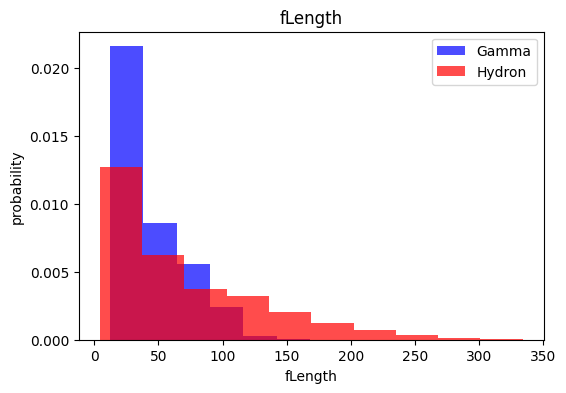

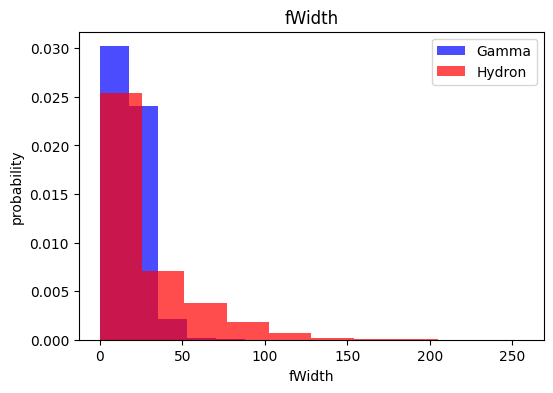

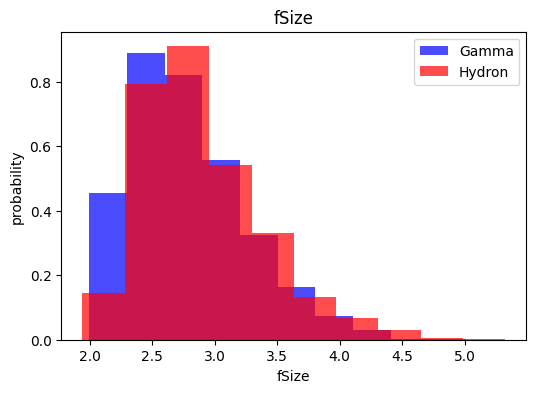

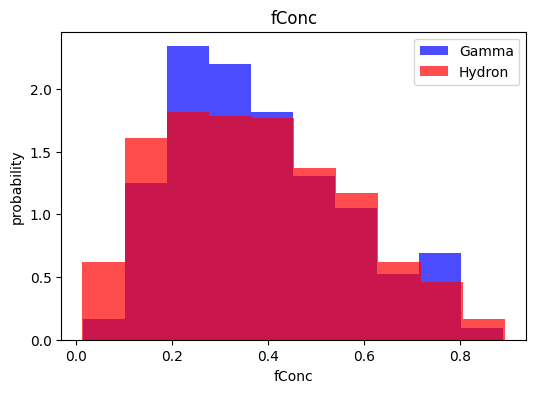

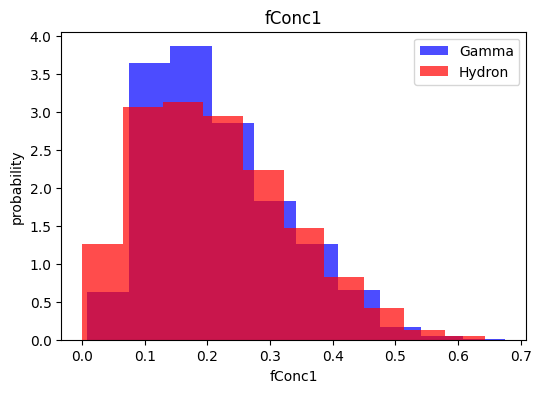

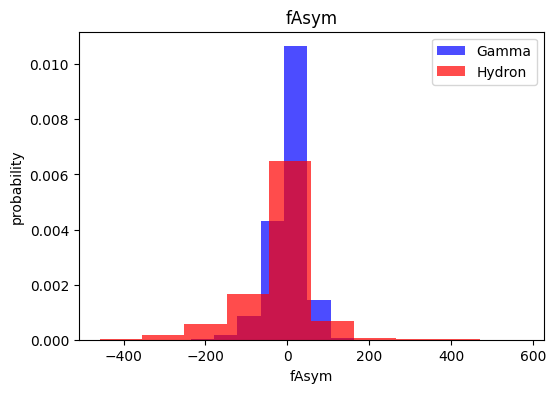

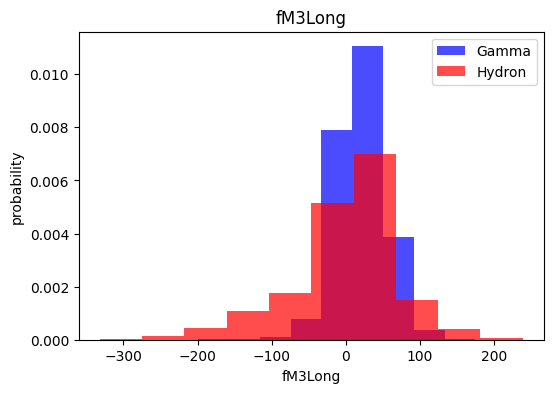

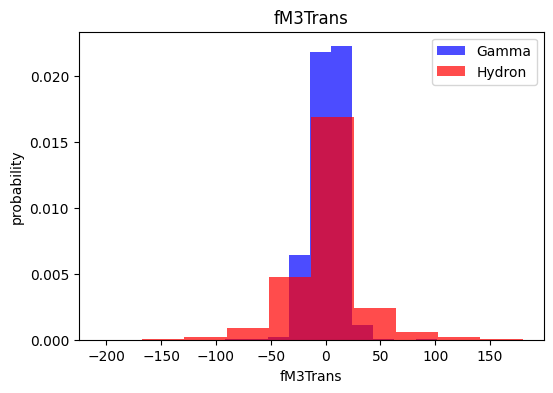

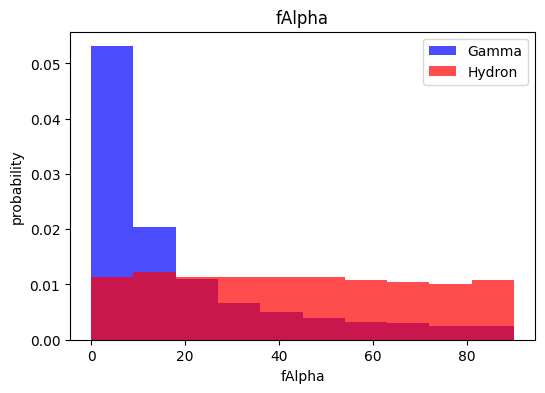

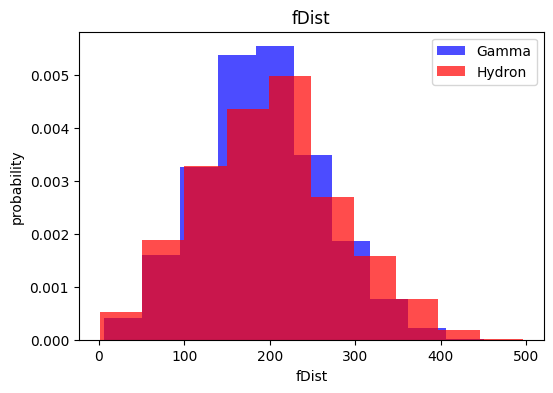

In [402]:
for lable in cols[:-1]:  # Exclude the last column 'class'
    # Plot histograms for each feature
    plt.figure(figsize=(6, 4))
    plt.hist(df[df["class"] == 1][lable], alpha=0.7, label='Gamma', color='blue', density=True)
    plt.hist(df[df["class"] == 0][lable], alpha=0.7, label='Hydron', color='red', density=True)
    plt.title(lable)
    plt.xlabel(lable)
    plt.ylabel('probability')
    plt.legend()
    plt.show()

## Train, Validation and Test Split


In [403]:

from sklearn.preprocessing import StandardScaler # Normalize the features

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # 60% train, 20% validation, 20% test


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [404]:

from imblearn.over_sampling import RandomOverSampler # Function to scale the dataset and optionally oversample the minority class

def scale_dataset(dataframe, oversample=False):
    # Separate features (X) and labels (y)
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values    
    
    # Standardize features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Oversample if requested
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    return dataframe, x, y

In [405]:
train, x_train, y_train = scale_dataset(train, oversample=True) # Oversample the training set
valid, x_valid, y_valid = scale_dataset(valid, oversample=False) # Don't oversample the validation set
test,  x_test,  y_test  = scale_dataset(test, oversample=True)


## KNN

In [406]:
from sklearn.neighbors import KNeighborsClassifier # Function to create and train a KNN model
from sklearn.metrics import confusion_matrix, classification_report # Function to evaluate the model

In [407]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Initialize KNN model with 5 neighbors
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [408]:
y_pred = knn_model.predict(x_test) # Predict the labels for the test set

In [409]:
print (classification_report(y_test, y_pred)) # Print classification report

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2487
           1       0.77      0.86      0.81      2487

    accuracy                           0.80      4974
   macro avg       0.80      0.80      0.80      4974
weighted avg       0.80      0.80      0.80      4974



## Naive Bayes Classifier

In [410]:
from sklearn.naive_bayes import GaussianNB # Function to create and train a Gaussian Naive Bayes model

In [411]:
nb_model = GaussianNB() # Initialize Gaussian Naive Bayes model
nb_model = nb_model.fit(x_train, y_train)

In [412]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54      2487
           1       0.60      0.89      0.72      2487

    accuracy                           0.65      4974
   macro avg       0.69      0.65      0.63      4974
weighted avg       0.69      0.65      0.63      4974



## SVM

In [413]:
from sklearn.svm import SVC

In [414]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [415]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2487
           1       0.77      0.86      0.81      2487

    accuracy                           0.80      4974
   macro avg       0.80      0.80      0.80      4974
weighted avg       0.80      0.80      0.80      4974



## Neural Network

In [416]:
import tensorflow as tf

In [417]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,)), # Assuming 10 features
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])  

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])    

c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [418]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.title('Loss')           
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.title('Accuracy')           
    plt.show()                                  

In [419]:
history = nn_model.fit(
    x_train, y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

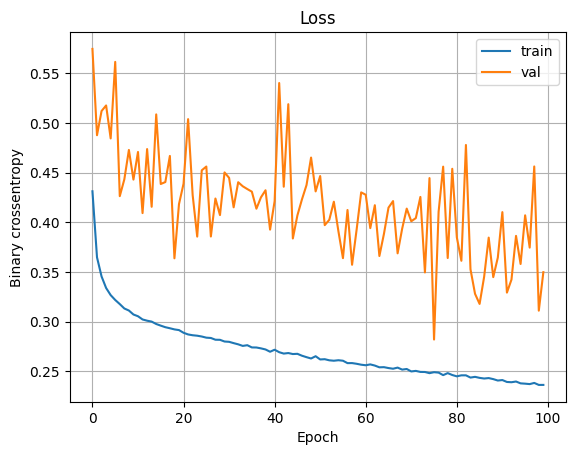

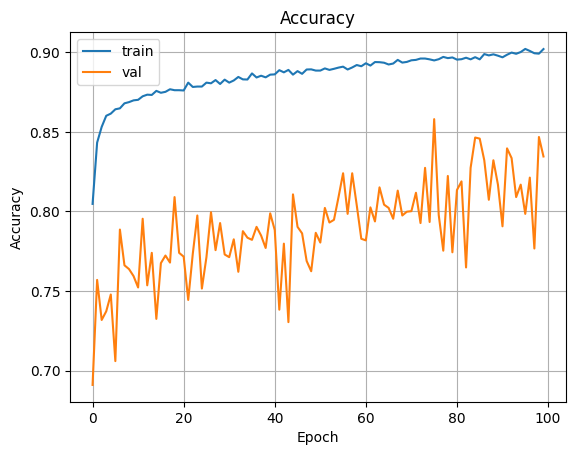

In [420]:
plot_loss(history)
plot_accuracy(history)

In [421]:
def train_model(x_train, y_train, num_nodes, dropout_probab, lr, epochs, batch_size):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)), # Assuming 10 features 
        tf.keras.layers.Dropout(dropout_probab), # Dropout layer with 0.5 probability
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_probab),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])  

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0 ) 

    return nn_model, history   

16 nodes, 0 dropout, 0.01 lr, 32 batch size


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


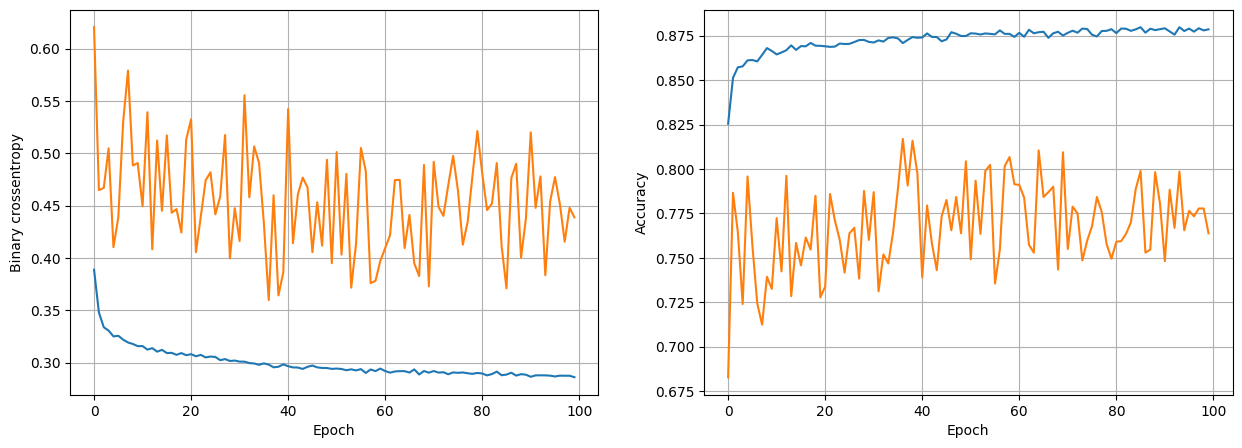

Validation loss: 0.3375
16 nodes, 0 dropout, 0.01 lr, 64 batch size


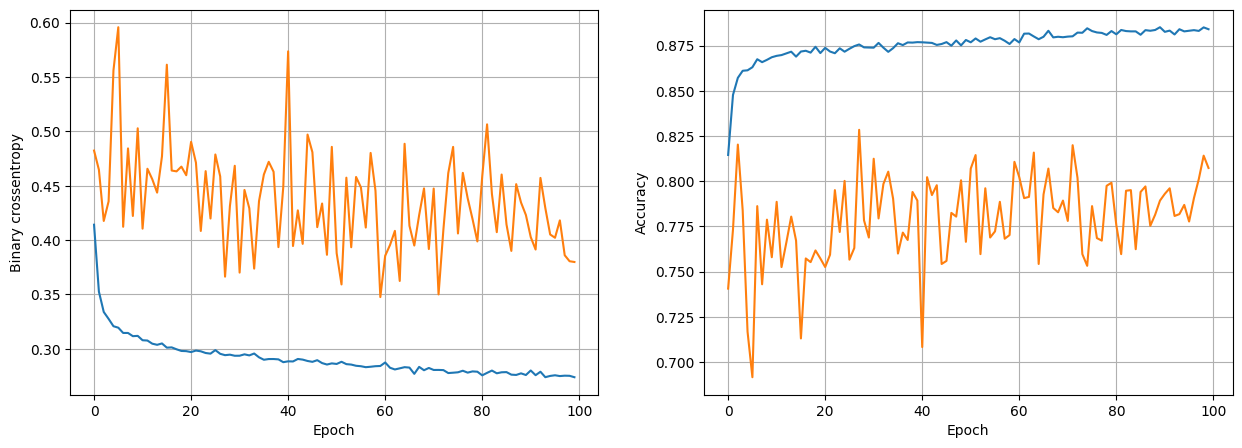

Validation loss: 0.3460
16 nodes, 0 dropout, 0.01 lr, 128 batch size


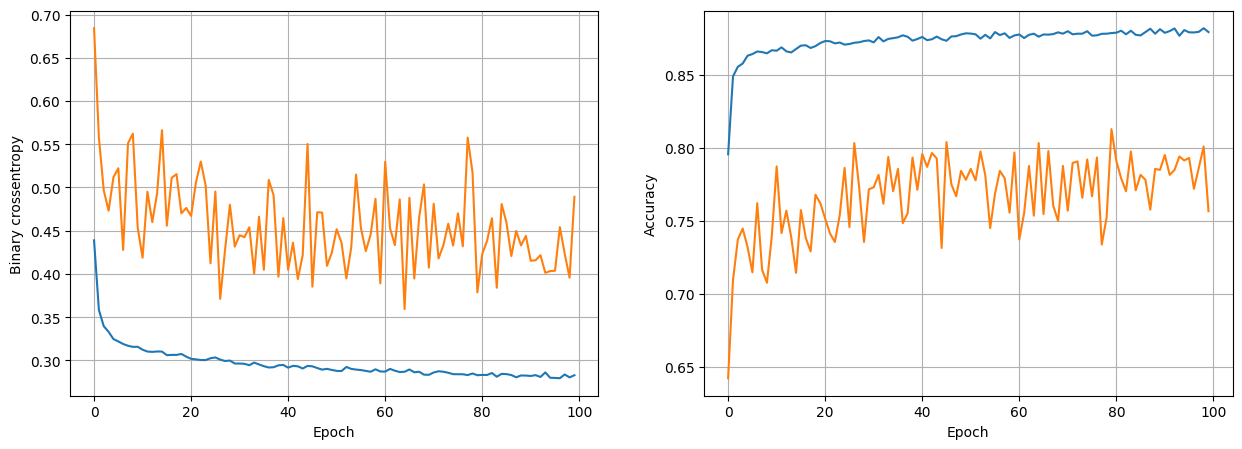

Validation loss: 0.3304
16 nodes, 0 dropout, 0.005 lr, 32 batch size


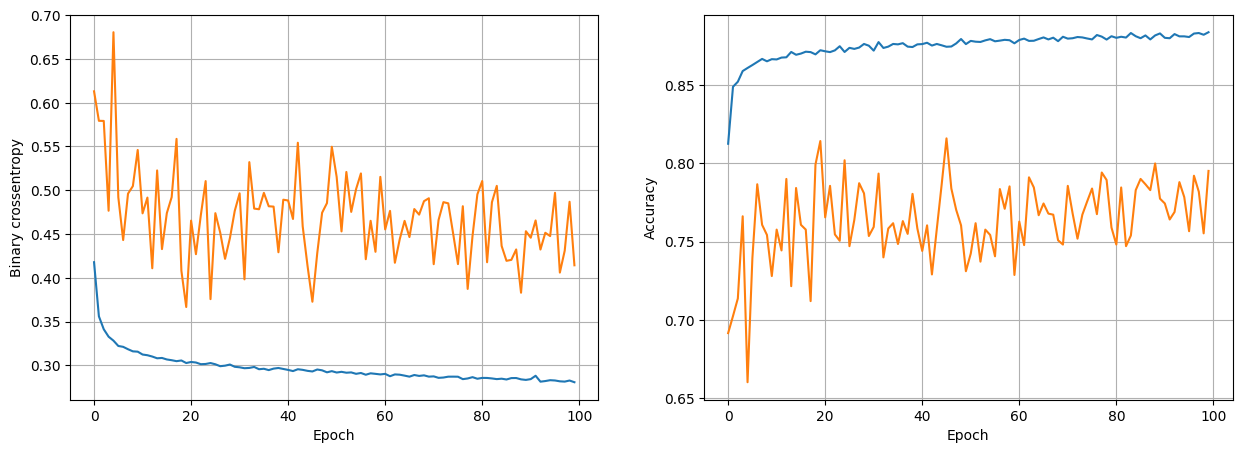

Validation loss: 0.3469
16 nodes, 0 dropout, 0.005 lr, 64 batch size


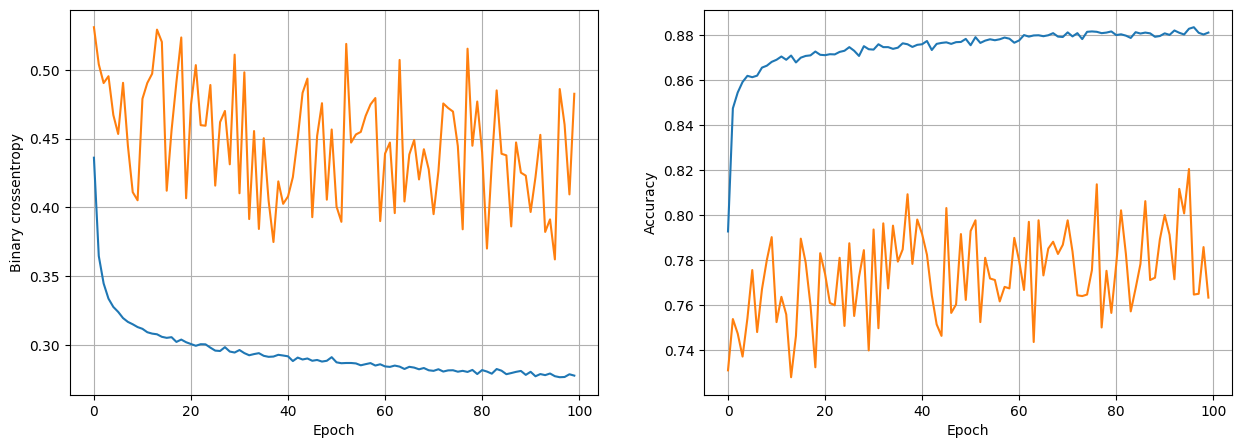

Validation loss: 0.3306
16 nodes, 0 dropout, 0.005 lr, 128 batch size


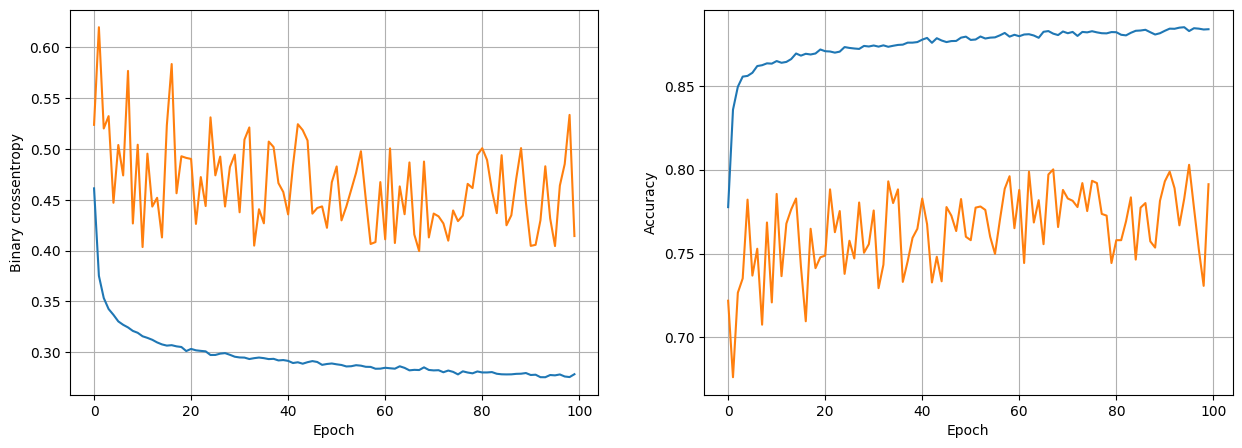

Validation loss: 0.3235
16 nodes, 0 dropout, 0.001 lr, 32 batch size


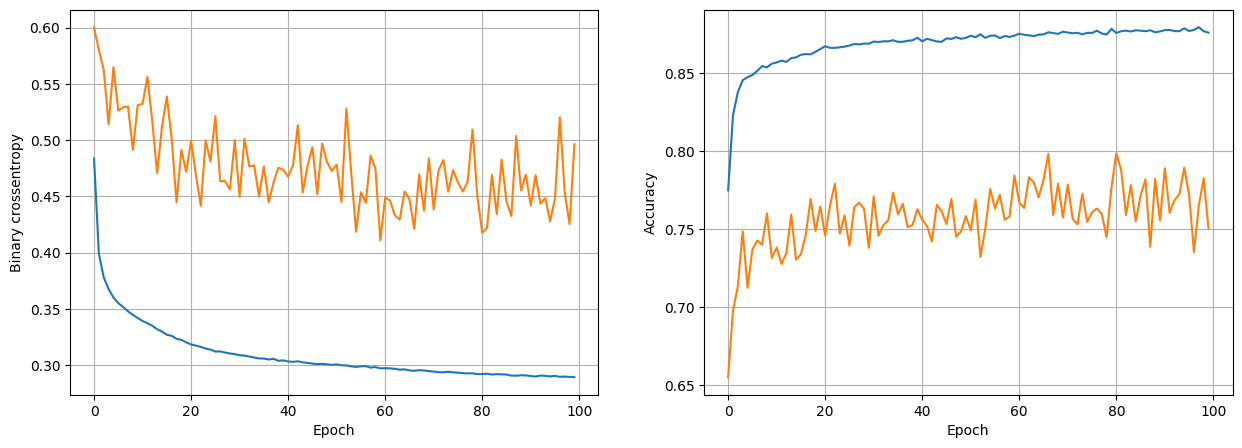

Validation loss: 0.3219
16 nodes, 0 dropout, 0.001 lr, 64 batch size


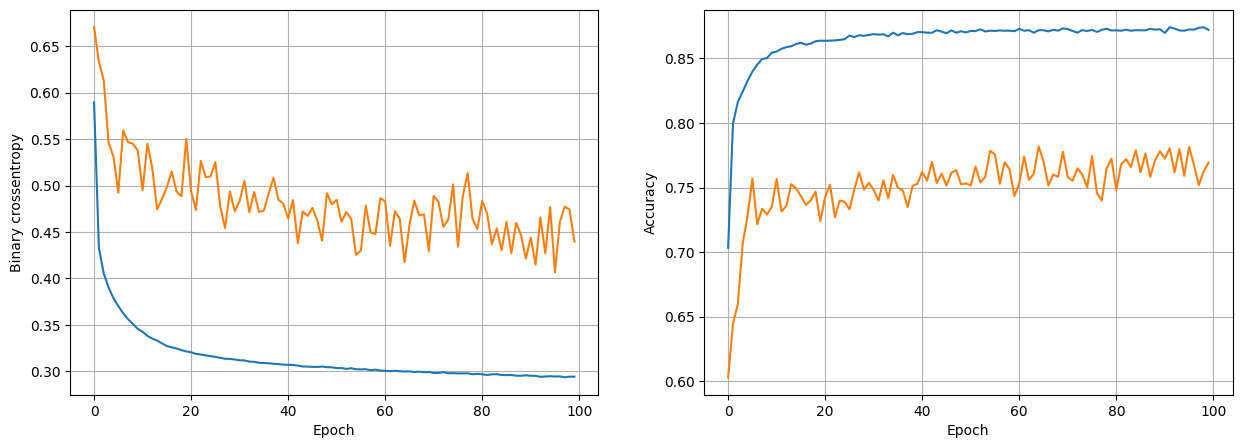

Validation loss: 0.3188
16 nodes, 0 dropout, 0.001 lr, 128 batch size


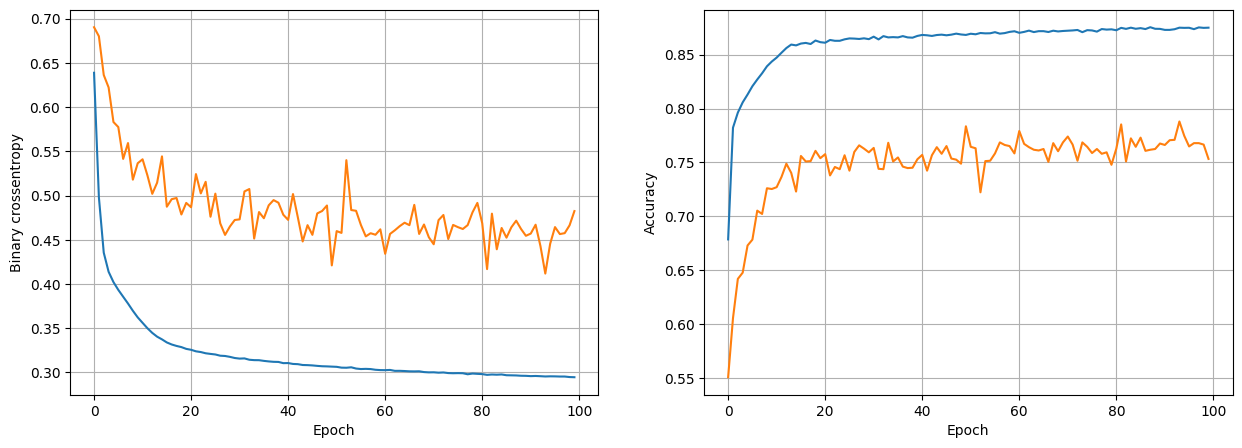

Validation loss: 0.3241
16 nodes, 0.2 dropout, 0.01 lr, 32 batch size


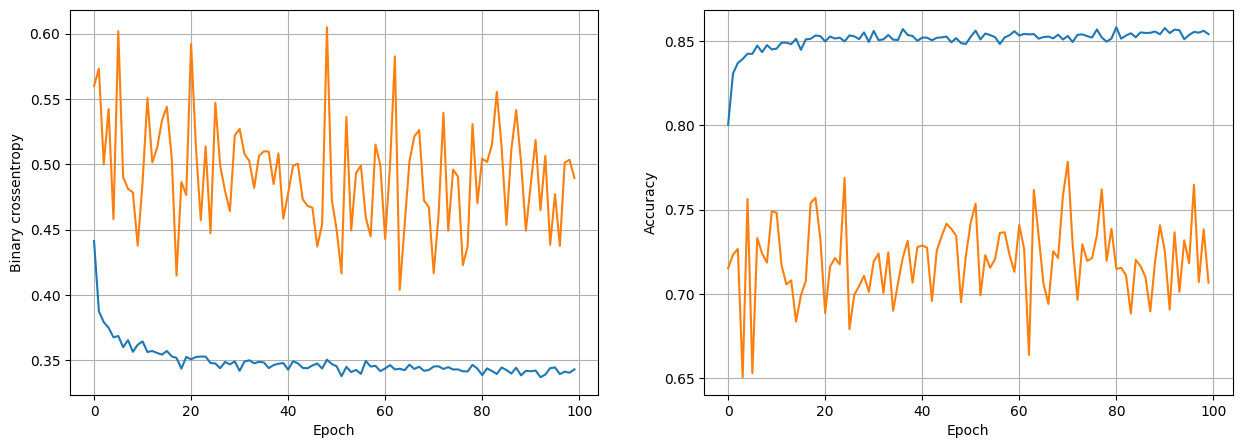

Validation loss: 0.3298
16 nodes, 0.2 dropout, 0.01 lr, 64 batch size


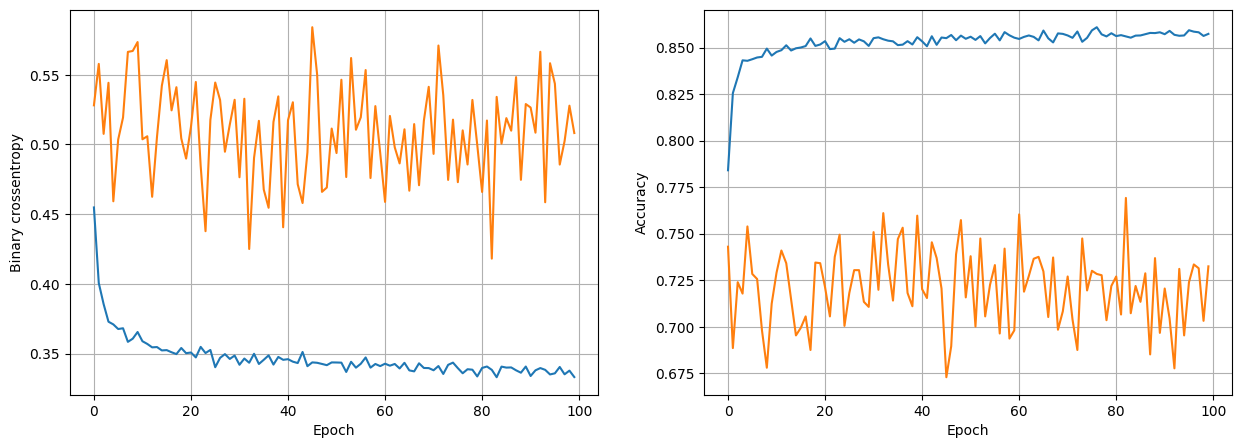

Validation loss: 0.3228
16 nodes, 0.2 dropout, 0.01 lr, 128 batch size


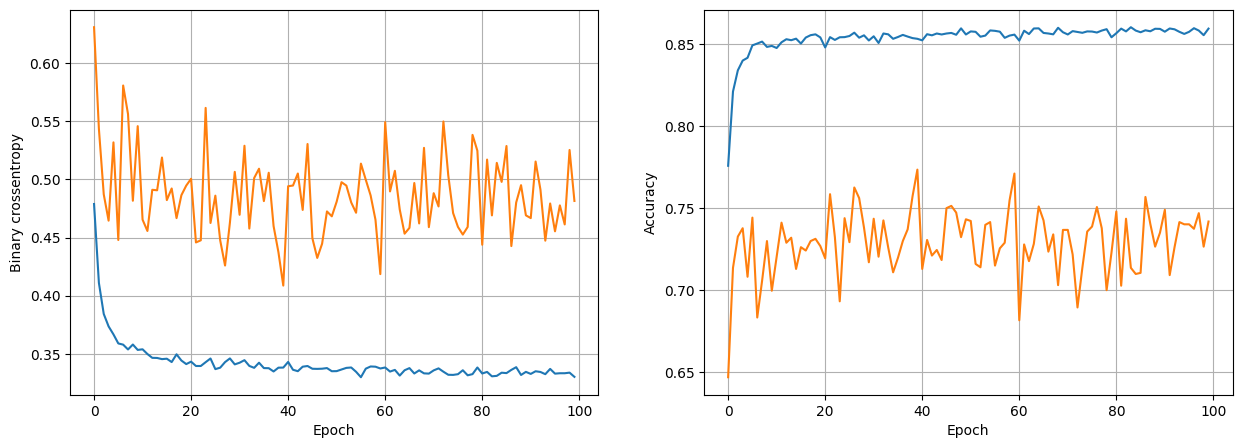

Validation loss: 0.3248
16 nodes, 0.2 dropout, 0.005 lr, 32 batch size


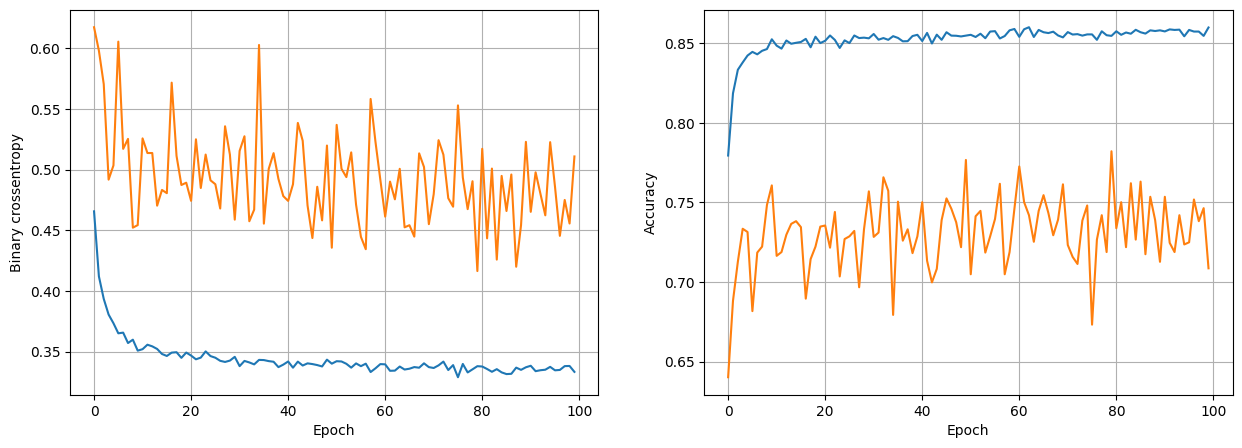

Validation loss: 0.3268
16 nodes, 0.2 dropout, 0.005 lr, 64 batch size


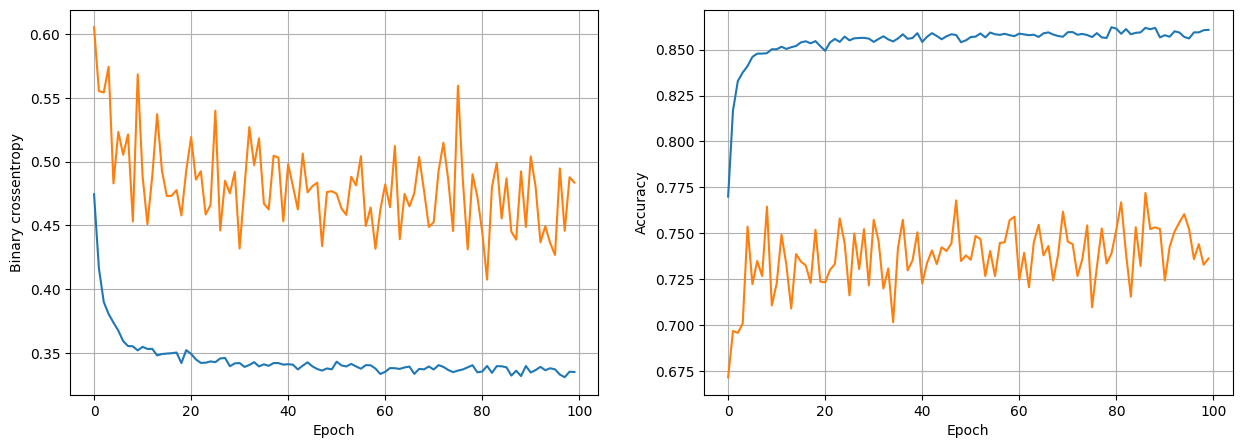

Validation loss: 0.3262
16 nodes, 0.2 dropout, 0.005 lr, 128 batch size


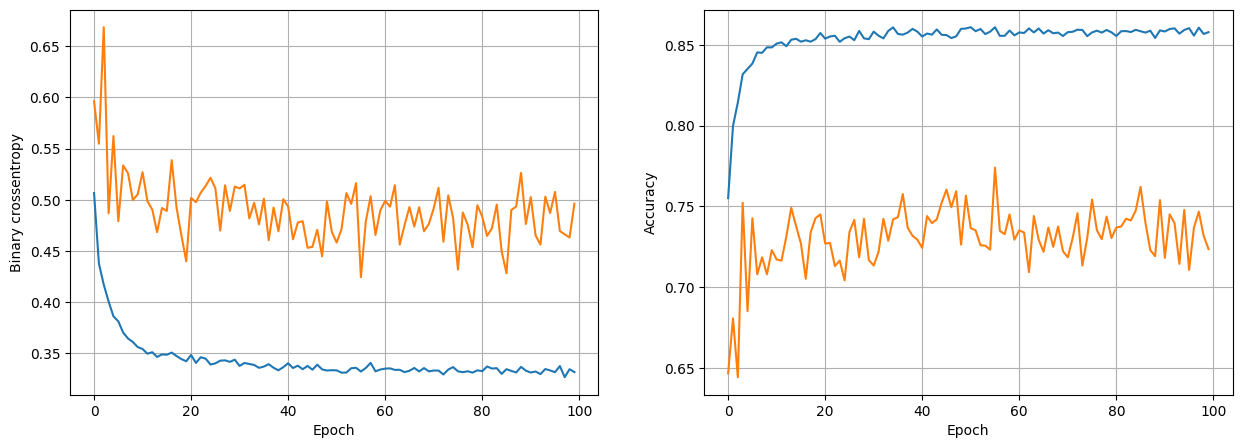

Validation loss: 0.3268
16 nodes, 0.2 dropout, 0.001 lr, 32 batch size


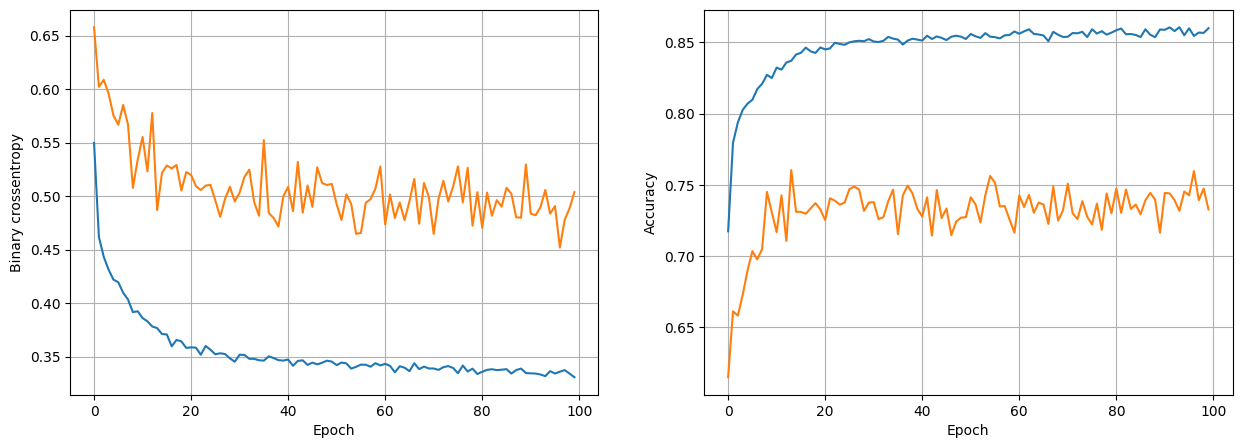

Validation loss: 0.3208
16 nodes, 0.2 dropout, 0.001 lr, 64 batch size


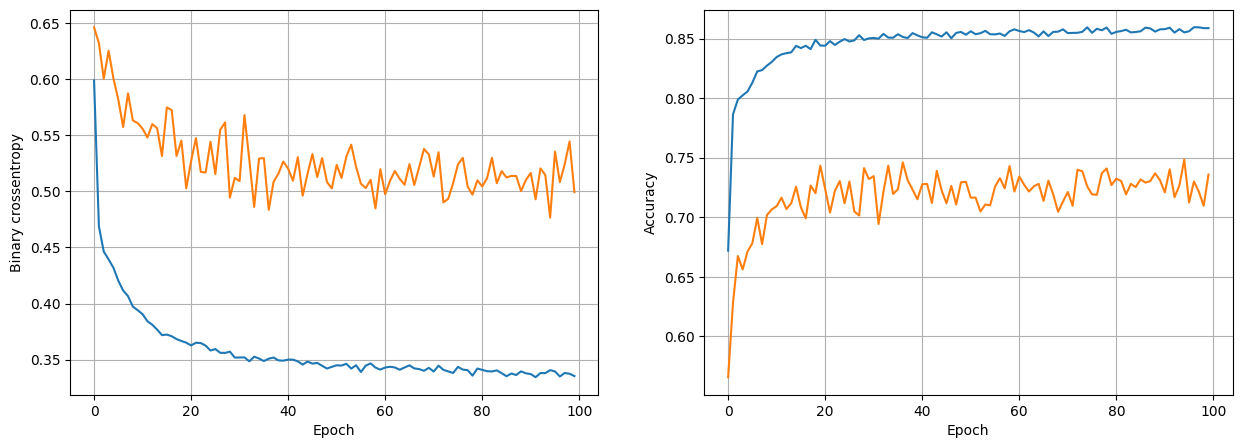

Validation loss: 0.3271
16 nodes, 0.2 dropout, 0.001 lr, 128 batch size


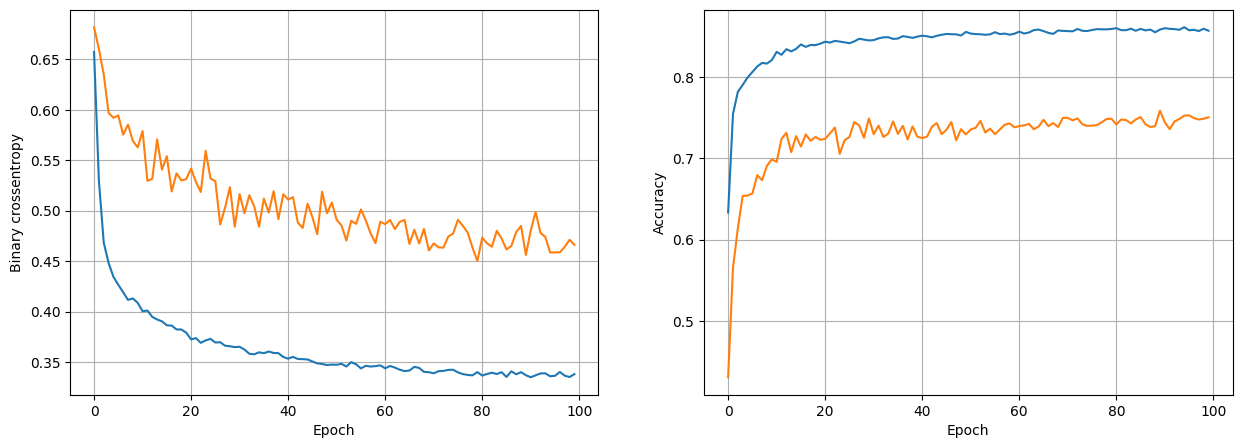

Validation loss: 0.3220
32 nodes, 0 dropout, 0.01 lr, 32 batch size


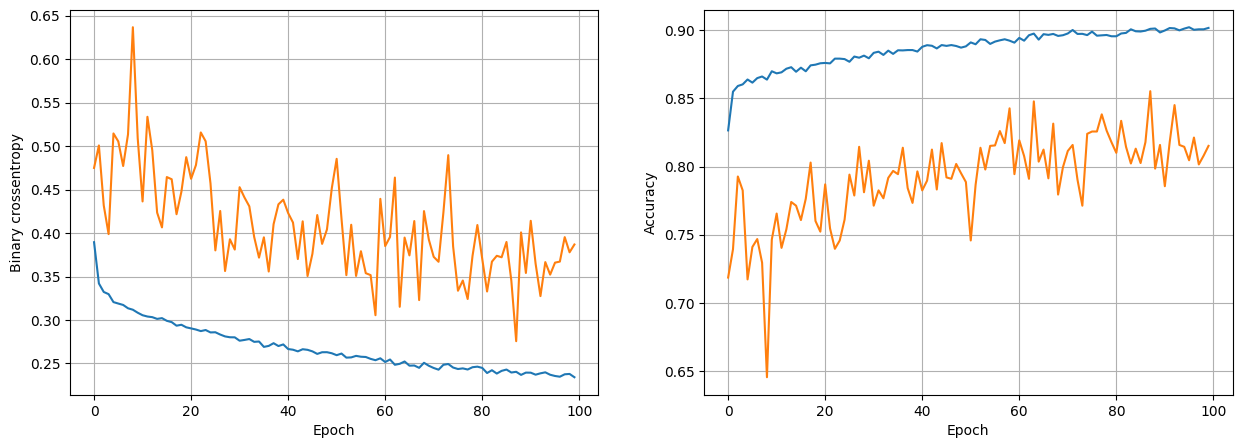

Validation loss: 0.4196
32 nodes, 0 dropout, 0.01 lr, 64 batch size


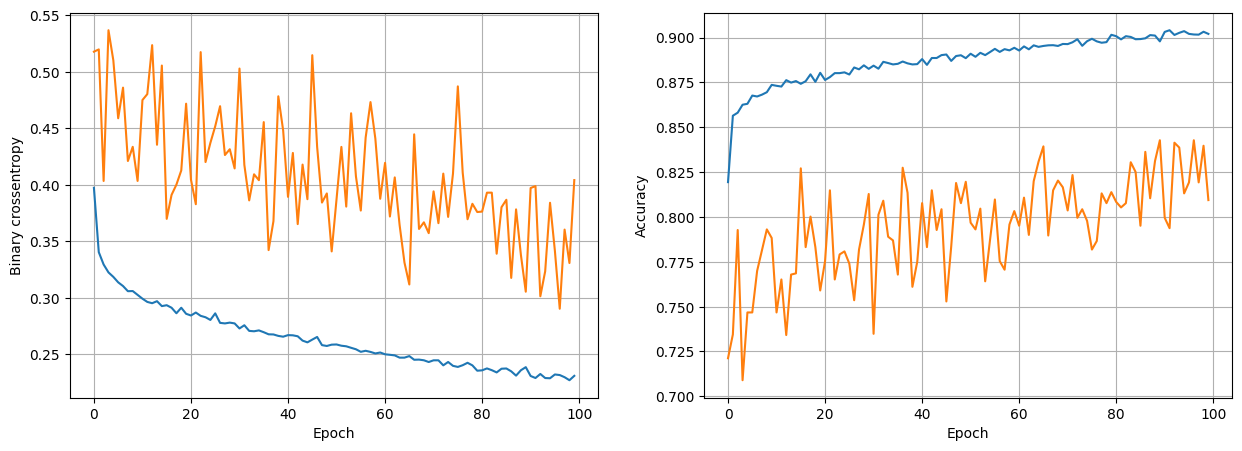

Validation loss: 0.4116
32 nodes, 0 dropout, 0.01 lr, 128 batch size


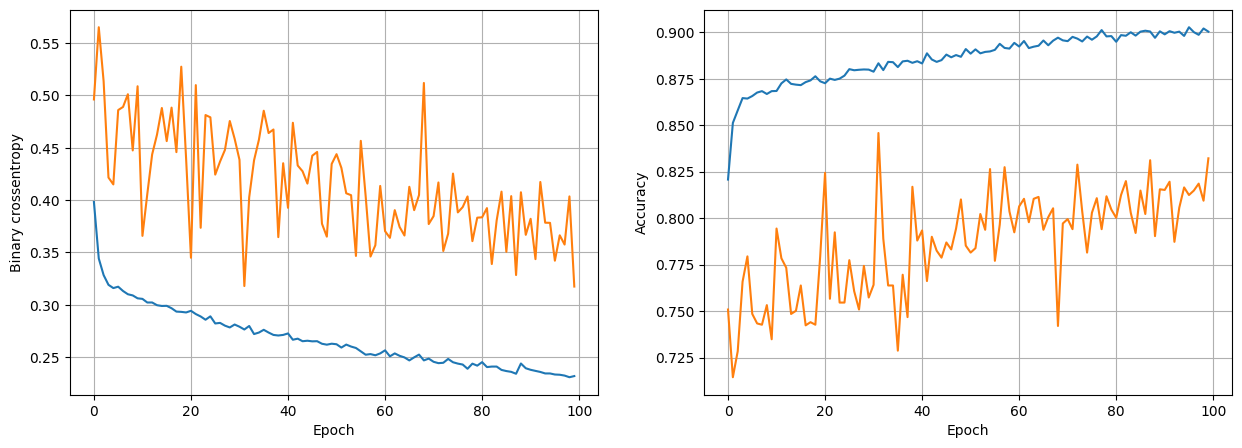

Validation loss: 0.4105
32 nodes, 0 dropout, 0.005 lr, 32 batch size


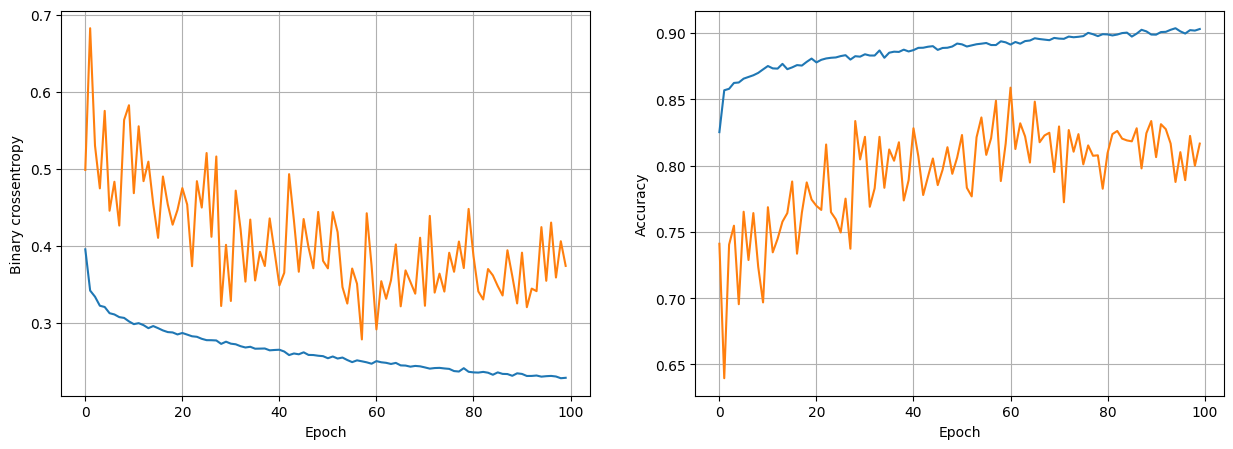

Validation loss: 0.4129
32 nodes, 0 dropout, 0.005 lr, 64 batch size


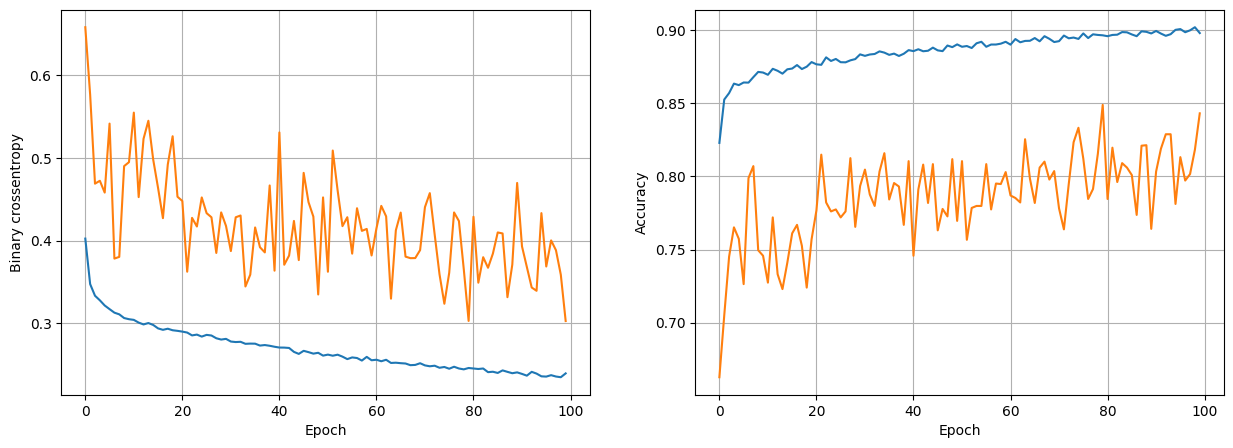

Validation loss: 0.4000
32 nodes, 0 dropout, 0.005 lr, 128 batch size


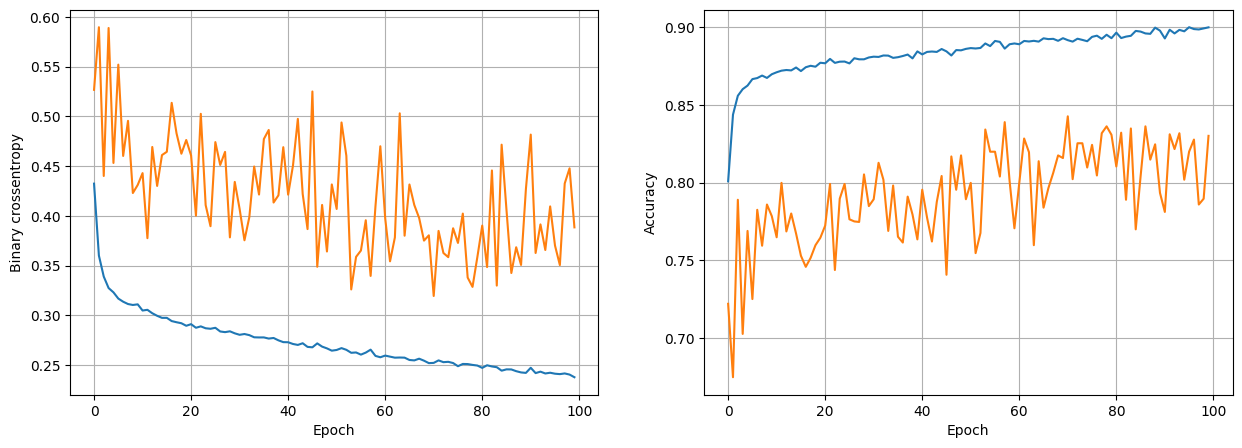

Validation loss: 0.3899
32 nodes, 0 dropout, 0.001 lr, 32 batch size


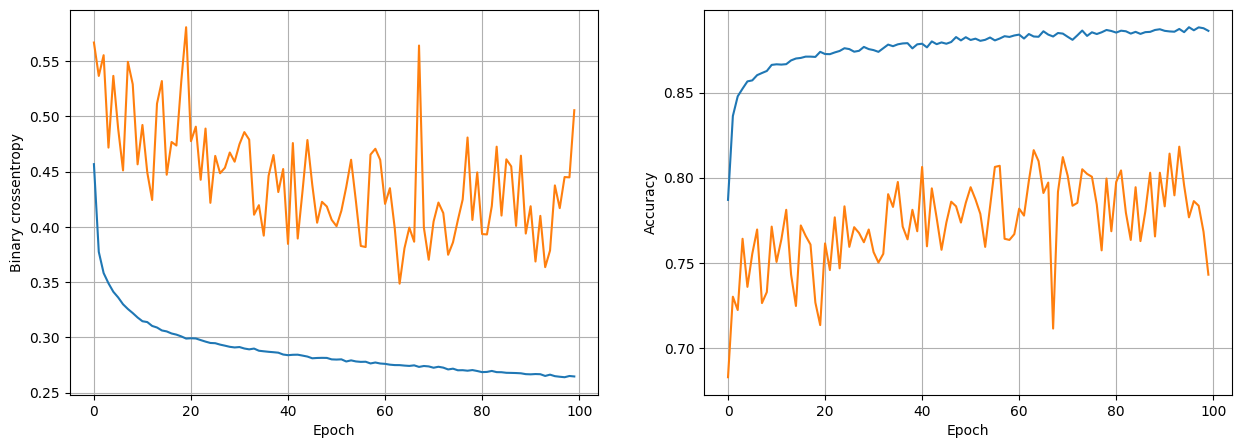

Validation loss: 0.3305
32 nodes, 0 dropout, 0.001 lr, 64 batch size


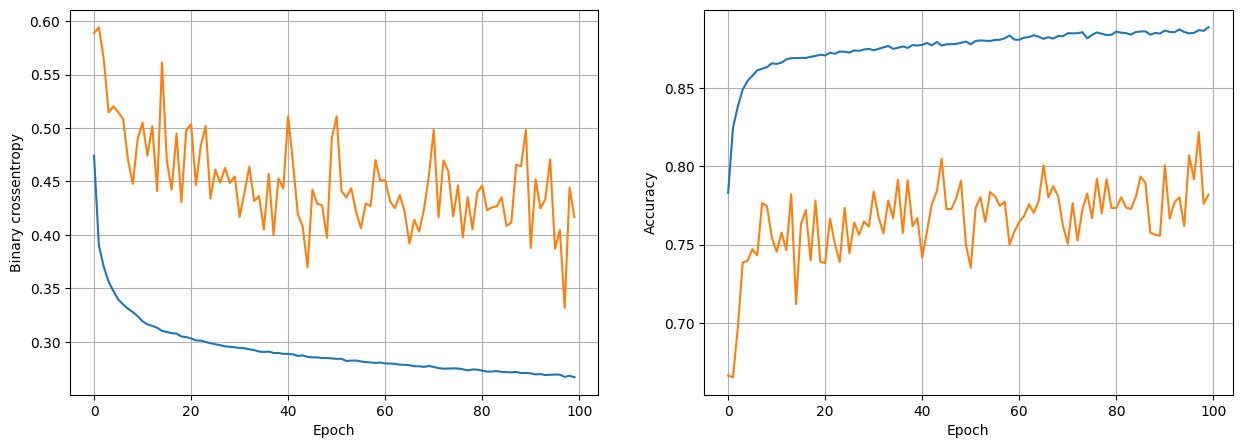

Validation loss: 0.3196
32 nodes, 0 dropout, 0.001 lr, 128 batch size


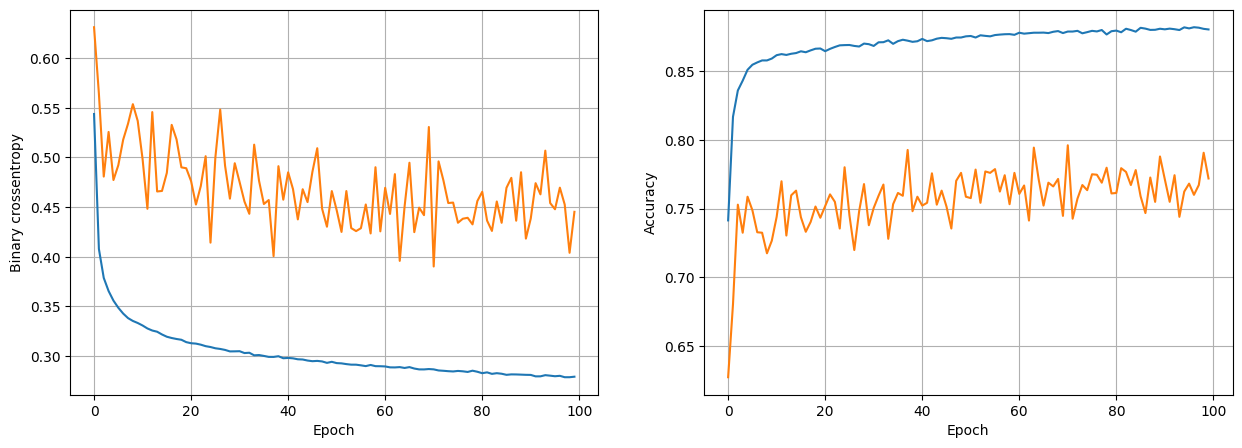

Validation loss: 0.3247
32 nodes, 0.2 dropout, 0.01 lr, 32 batch size


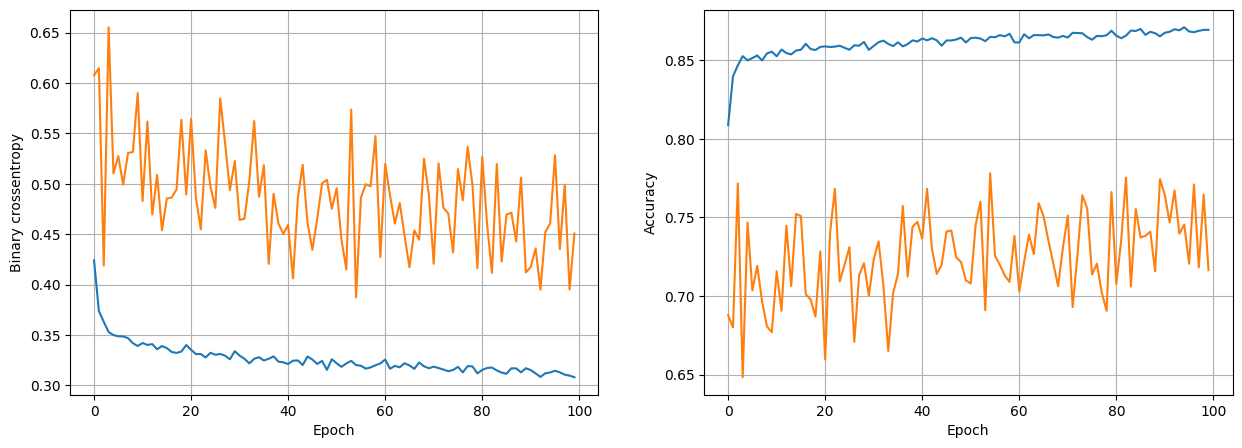

Validation loss: 0.3288
32 nodes, 0.2 dropout, 0.01 lr, 64 batch size


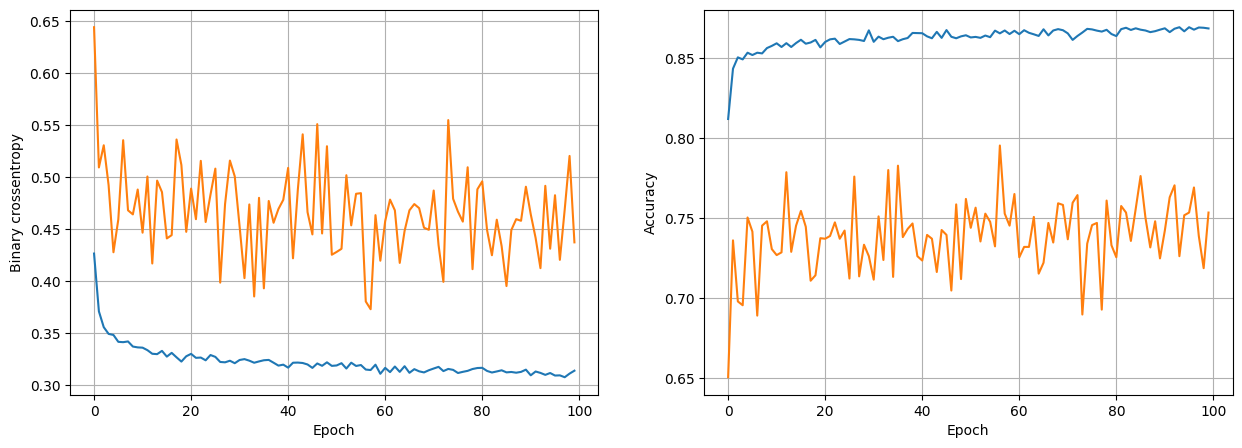

Validation loss: 0.3189
32 nodes, 0.2 dropout, 0.01 lr, 128 batch size


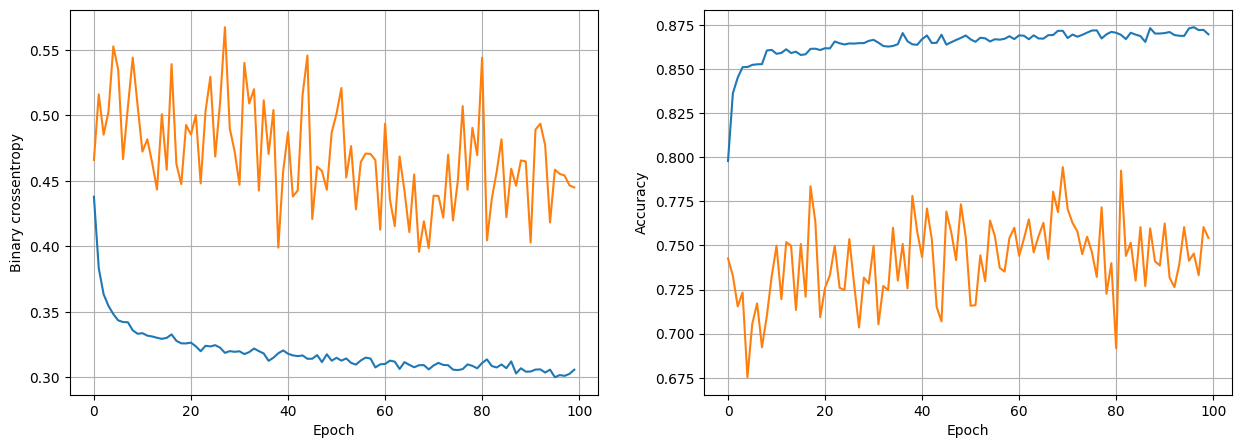

Validation loss: 0.3166
32 nodes, 0.2 dropout, 0.005 lr, 32 batch size


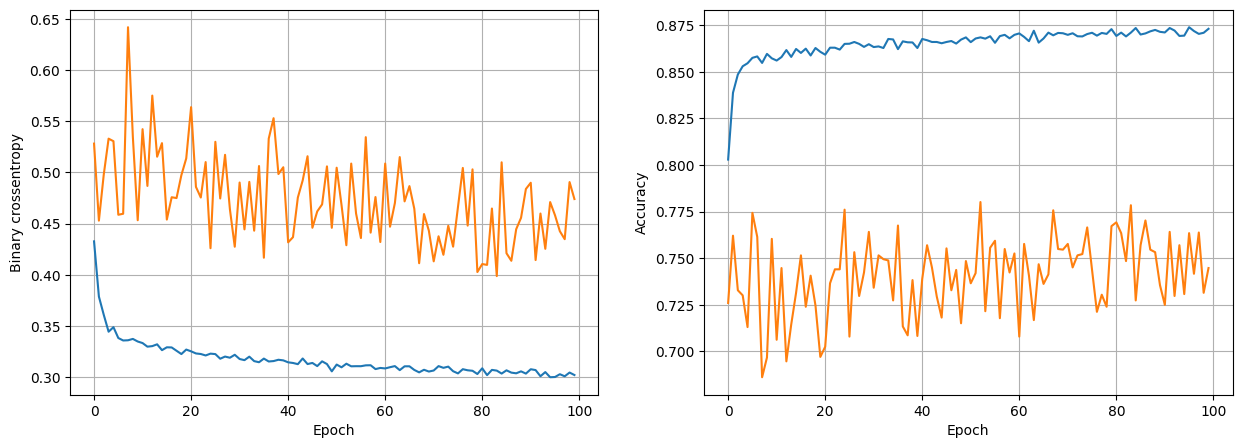

Validation loss: 0.3119
32 nodes, 0.2 dropout, 0.005 lr, 64 batch size


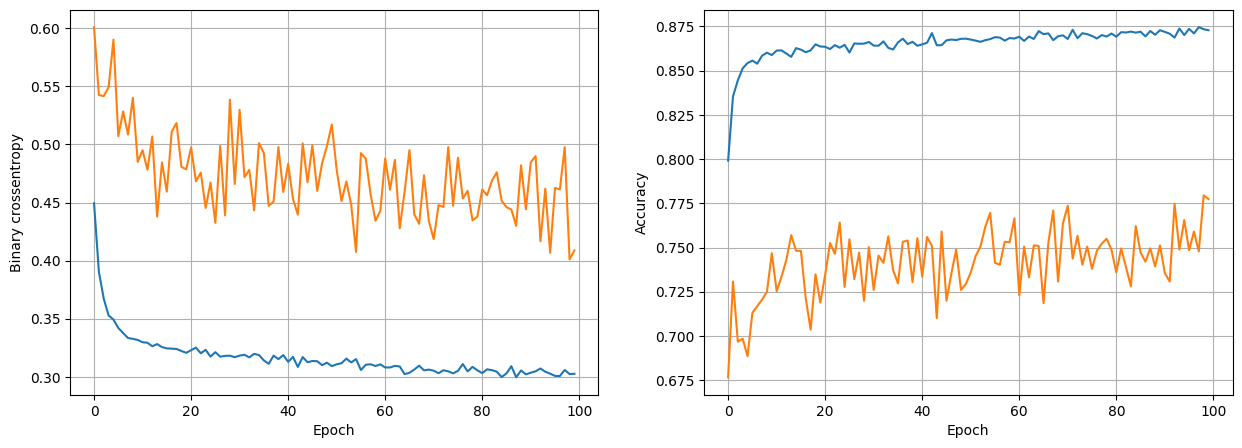

Validation loss: 0.3154
32 nodes, 0.2 dropout, 0.005 lr, 128 batch size


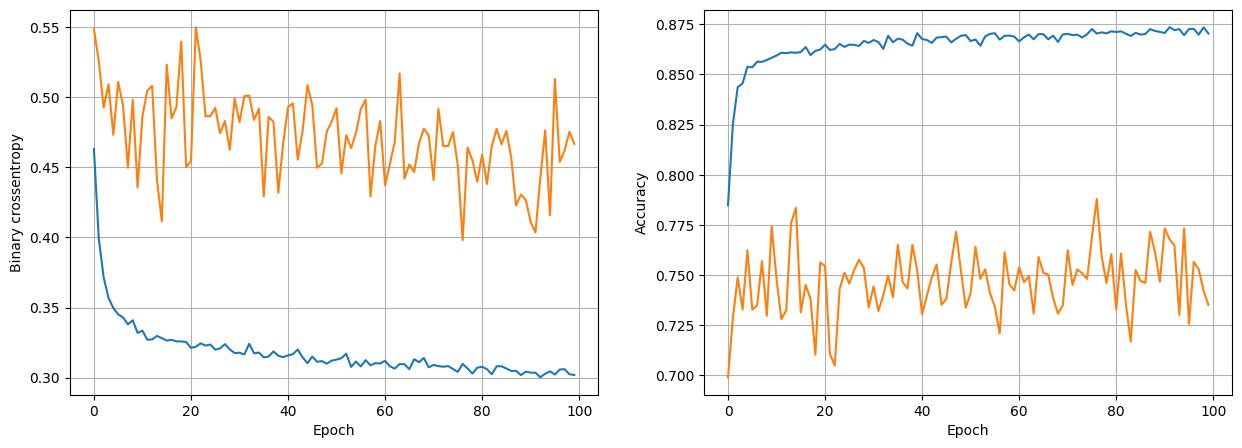

Validation loss: 0.3134
32 nodes, 0.2 dropout, 0.001 lr, 32 batch size


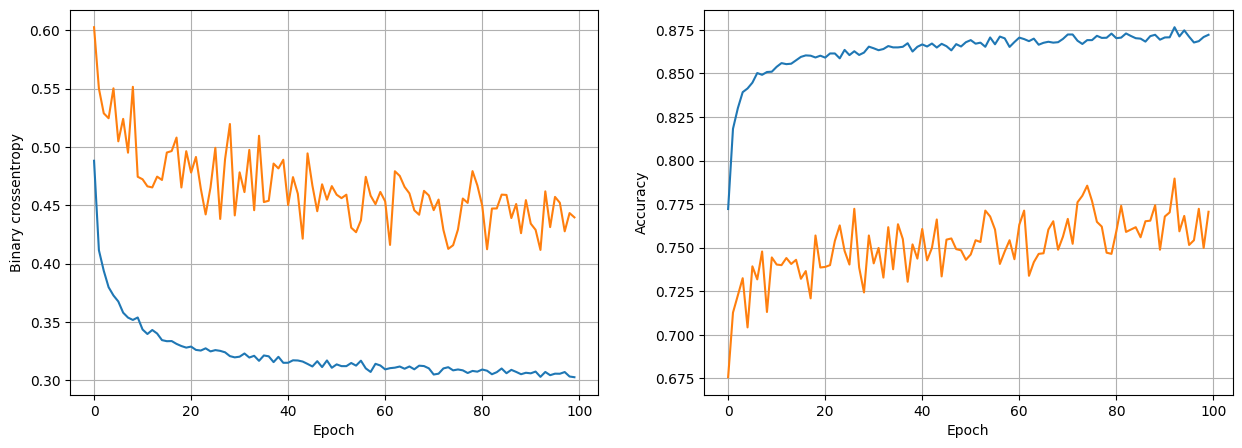

Validation loss: 0.3126
32 nodes, 0.2 dropout, 0.001 lr, 64 batch size


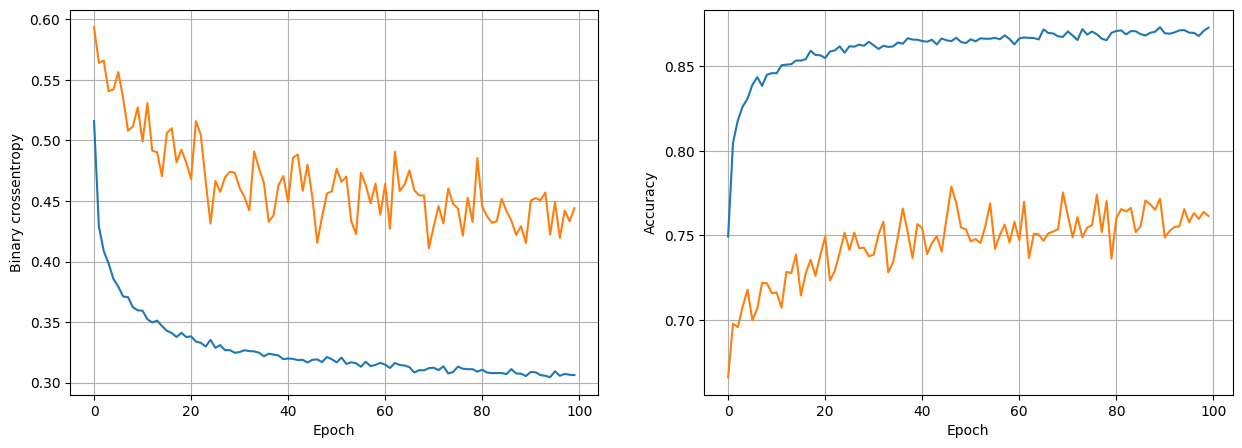

Validation loss: 0.3141
32 nodes, 0.2 dropout, 0.001 lr, 128 batch size


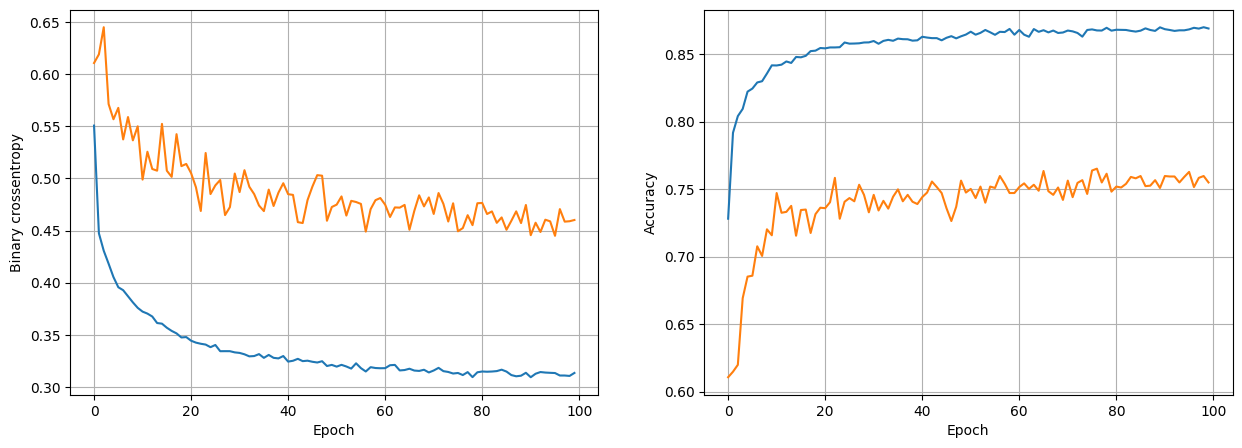

Validation loss: 0.3103
64 nodes, 0 dropout, 0.01 lr, 32 batch size


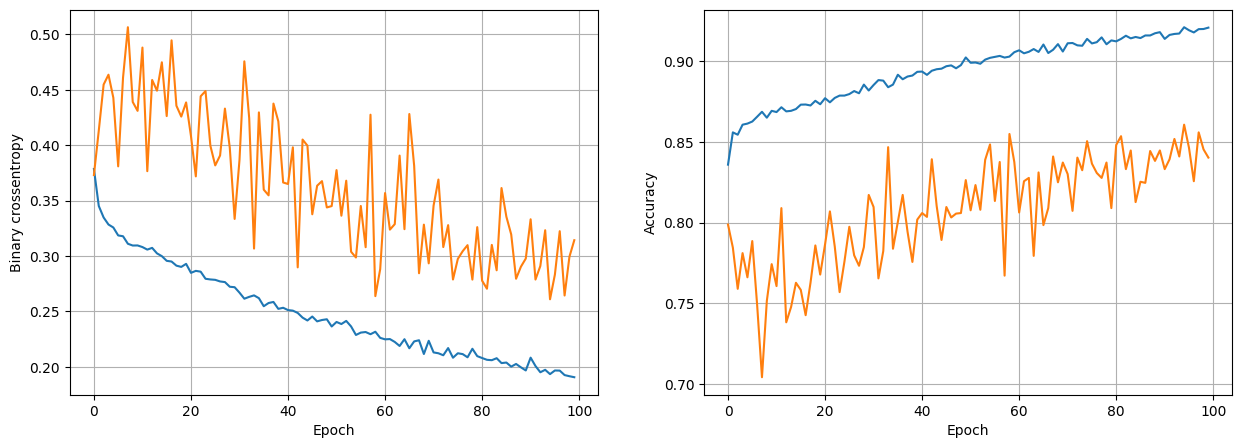

Validation loss: 0.5613
64 nodes, 0 dropout, 0.01 lr, 64 batch size


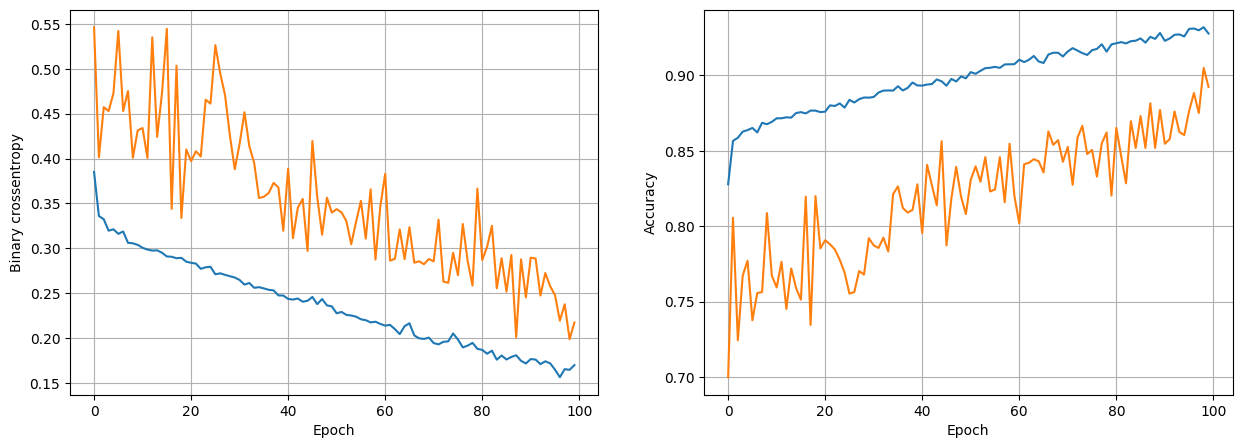

Validation loss: 0.6378
64 nodes, 0 dropout, 0.01 lr, 128 batch size


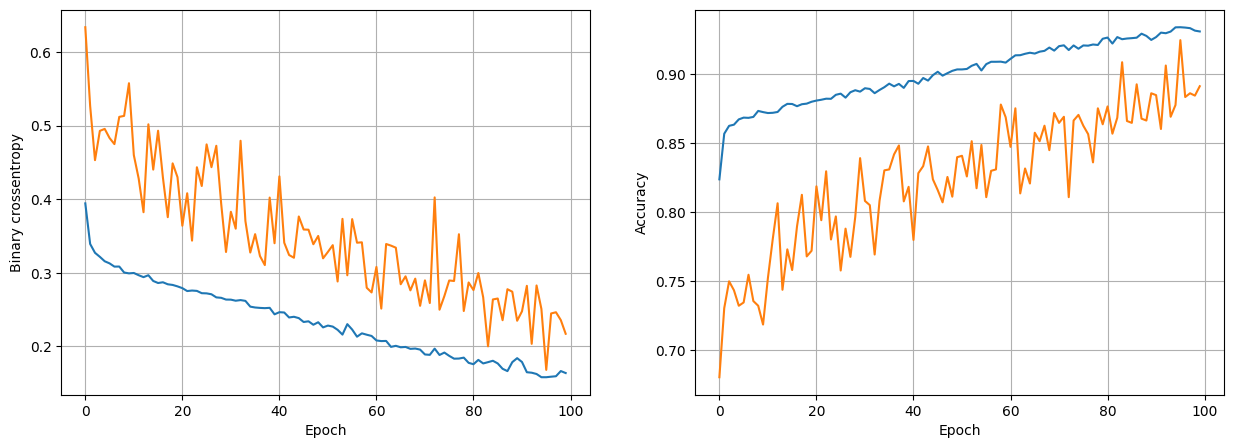

Validation loss: 0.5621
64 nodes, 0 dropout, 0.005 lr, 32 batch size


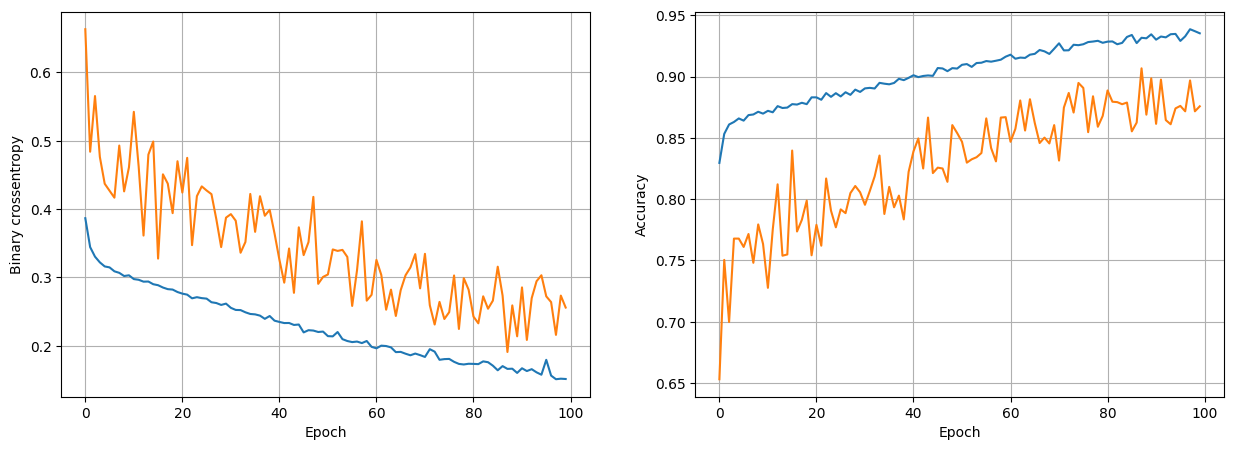

Validation loss: 0.6373
64 nodes, 0 dropout, 0.005 lr, 64 batch size


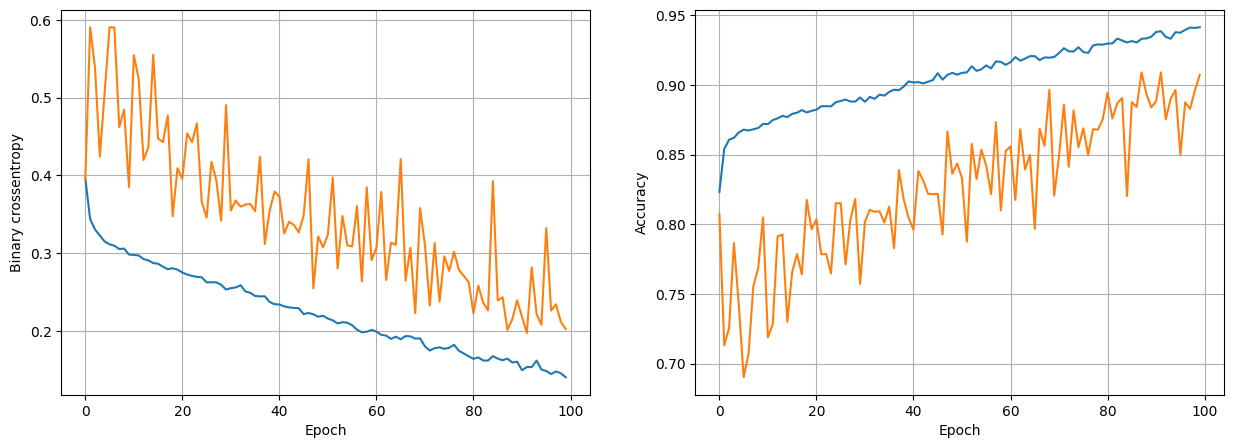

Validation loss: 0.6903
64 nodes, 0 dropout, 0.005 lr, 128 batch size


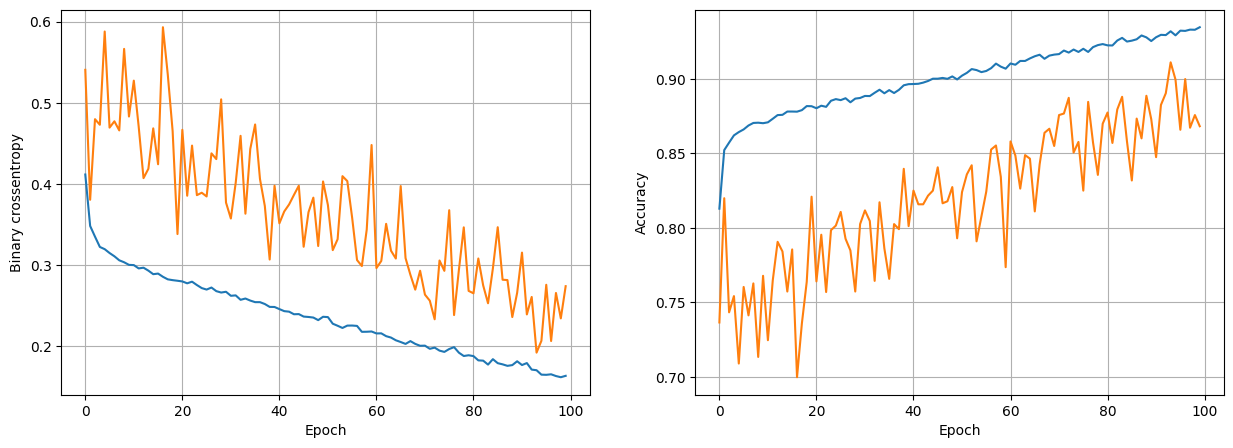

Validation loss: 0.4917
64 nodes, 0 dropout, 0.001 lr, 32 batch size


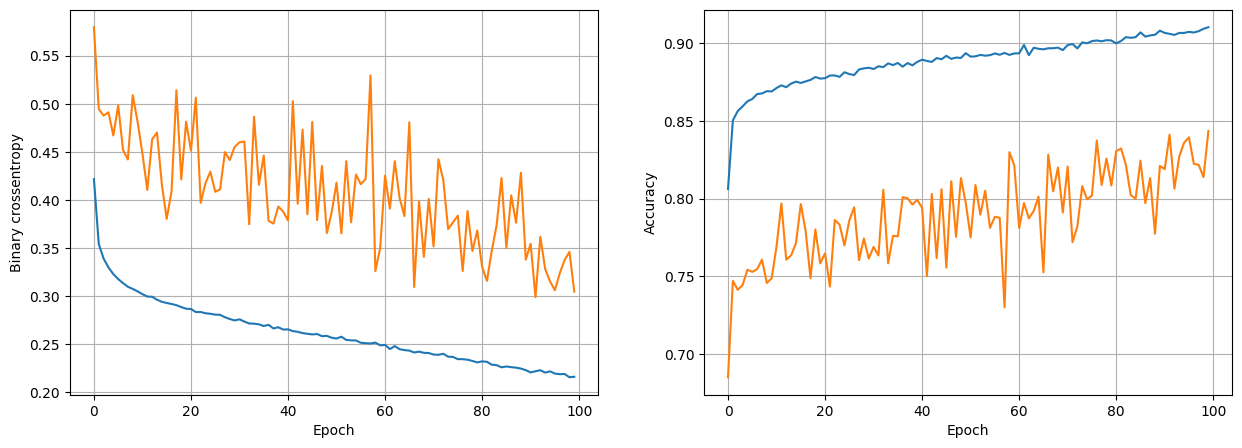

Validation loss: 0.3716
64 nodes, 0 dropout, 0.001 lr, 64 batch size


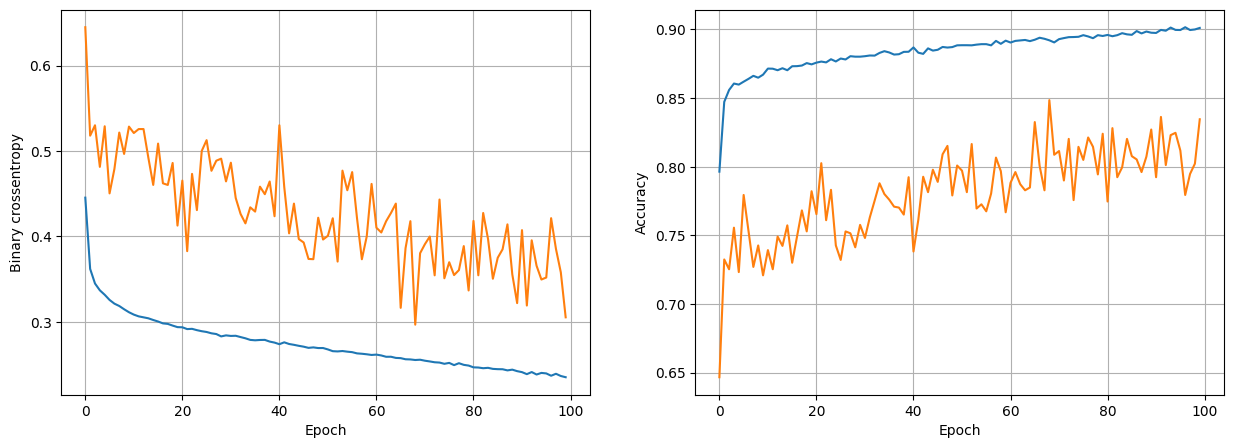

Validation loss: 0.3472
64 nodes, 0 dropout, 0.001 lr, 128 batch size


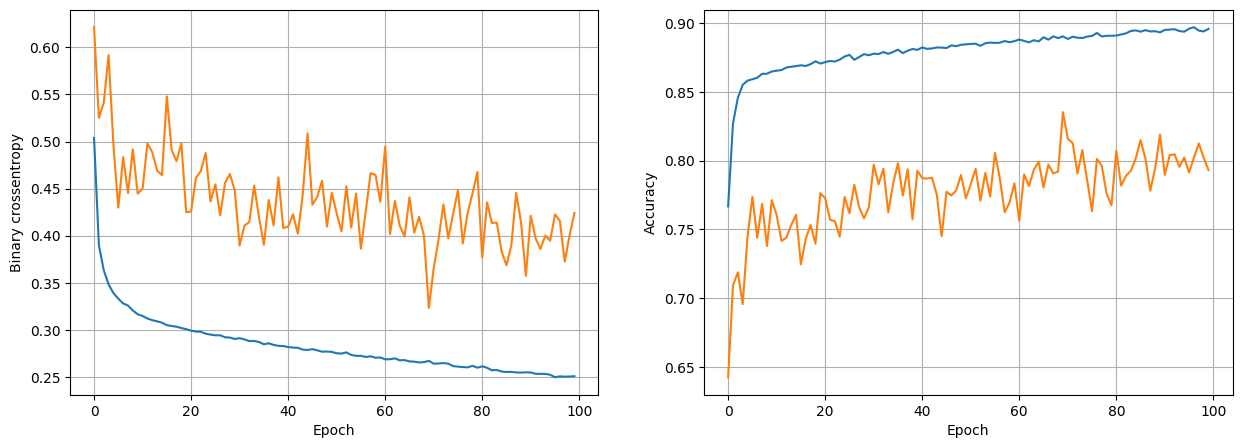

Validation loss: 0.3321
64 nodes, 0.2 dropout, 0.01 lr, 32 batch size


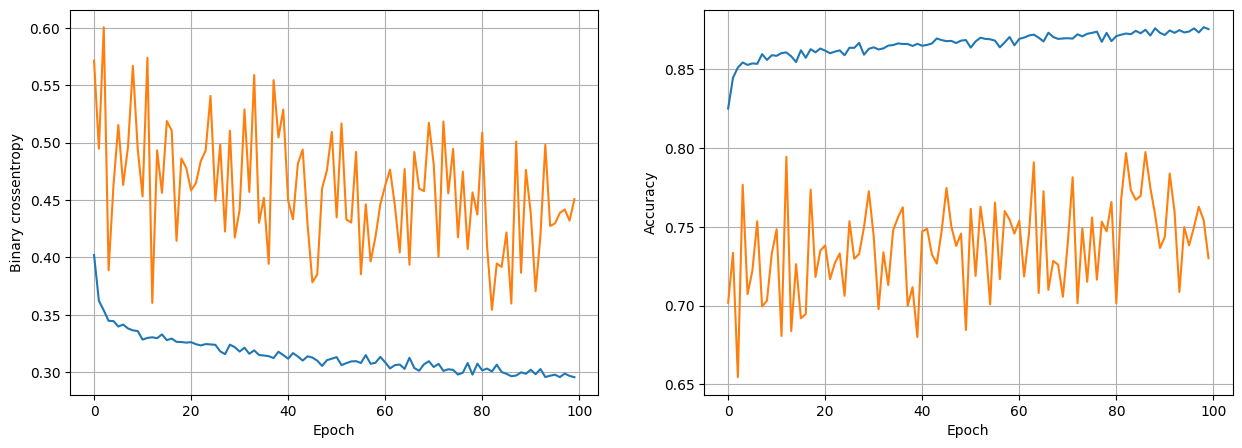

Validation loss: 0.3181
64 nodes, 0.2 dropout, 0.01 lr, 64 batch size


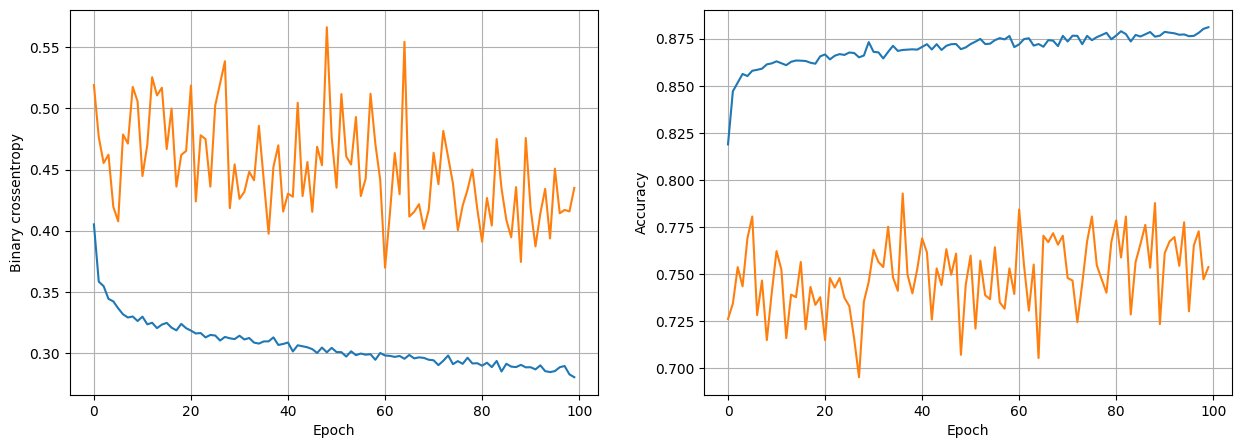

Validation loss: 0.3307
64 nodes, 0.2 dropout, 0.01 lr, 128 batch size


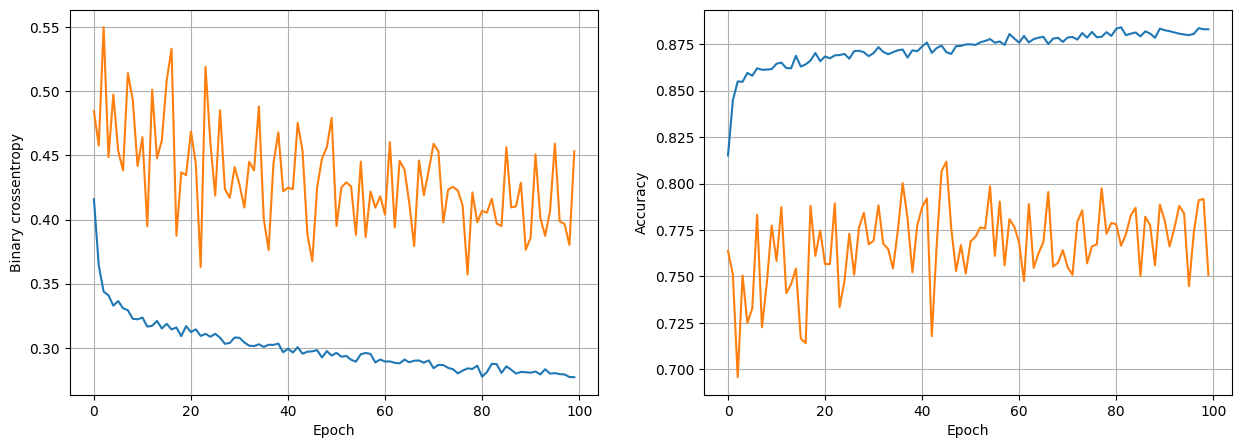

Validation loss: 0.3139
64 nodes, 0.2 dropout, 0.005 lr, 32 batch size


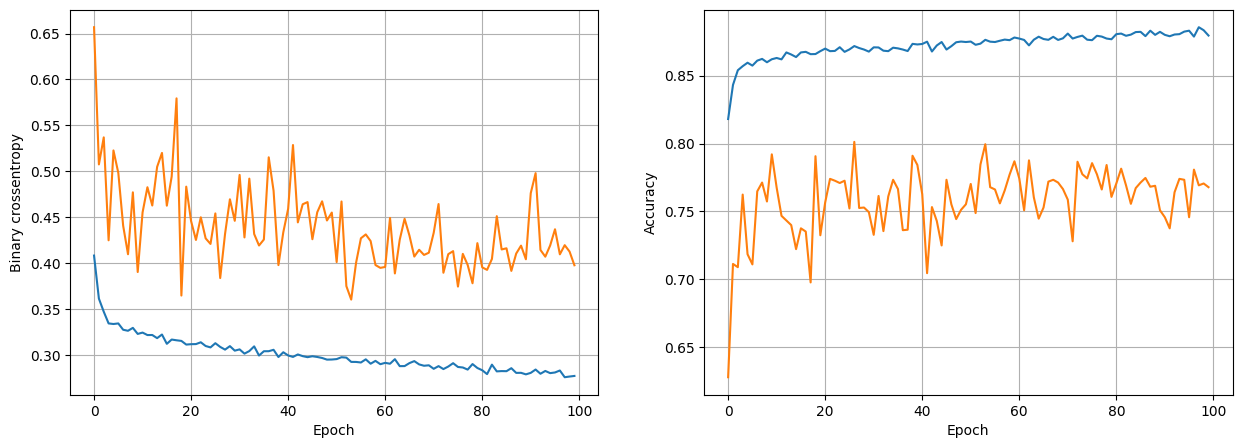

Validation loss: 0.3228
64 nodes, 0.2 dropout, 0.005 lr, 64 batch size


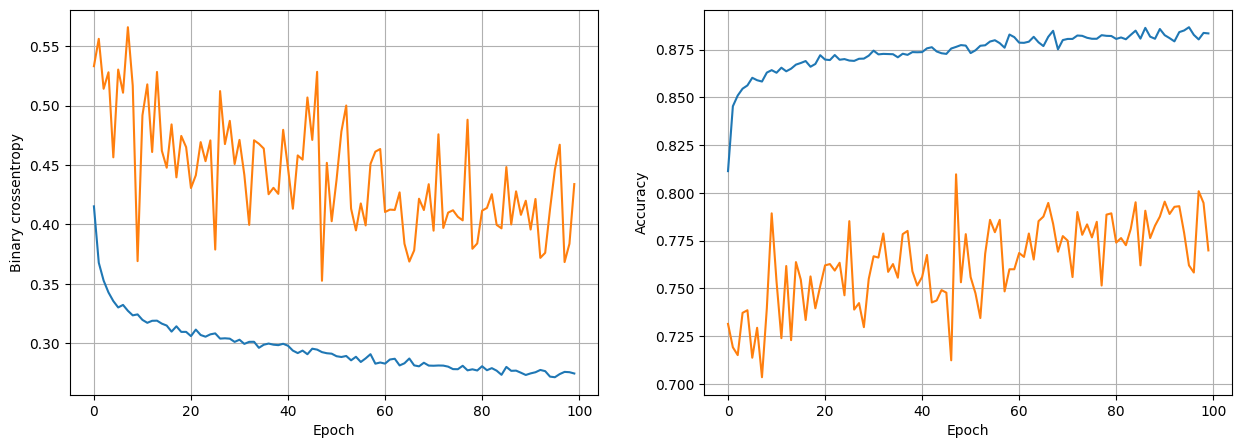

Validation loss: 0.3168
64 nodes, 0.2 dropout, 0.005 lr, 128 batch size


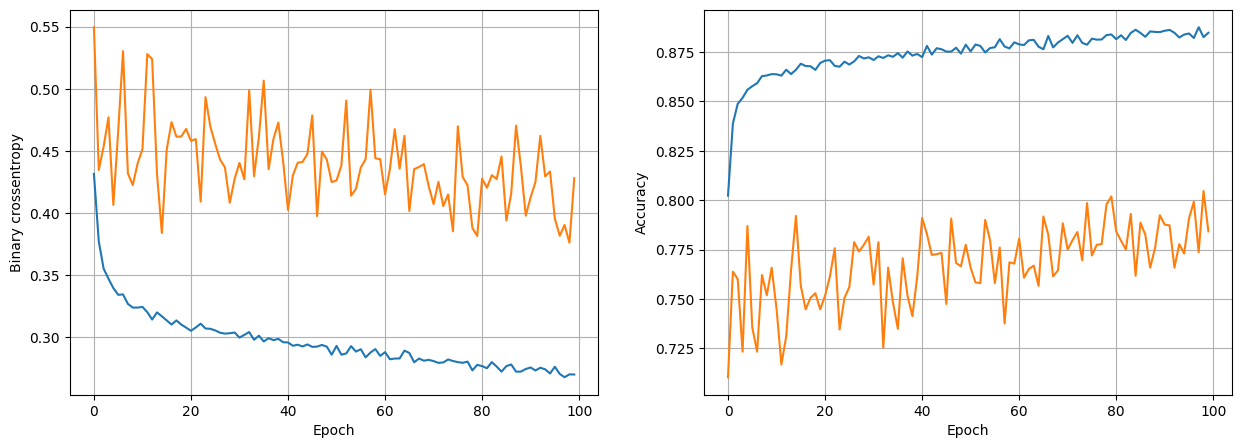

Validation loss: 0.3169
64 nodes, 0.2 dropout, 0.001 lr, 32 batch size


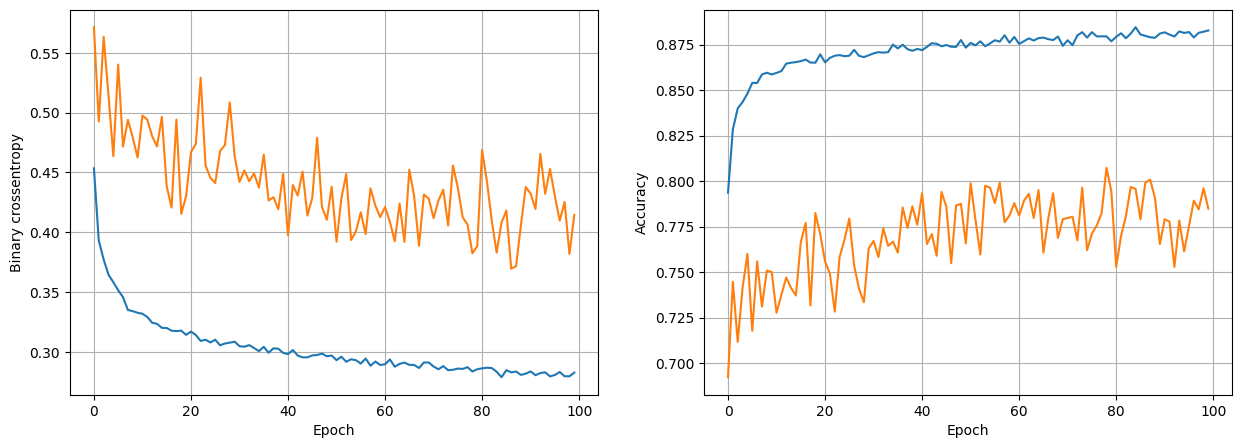

Validation loss: 0.3083
64 nodes, 0.2 dropout, 0.001 lr, 64 batch size


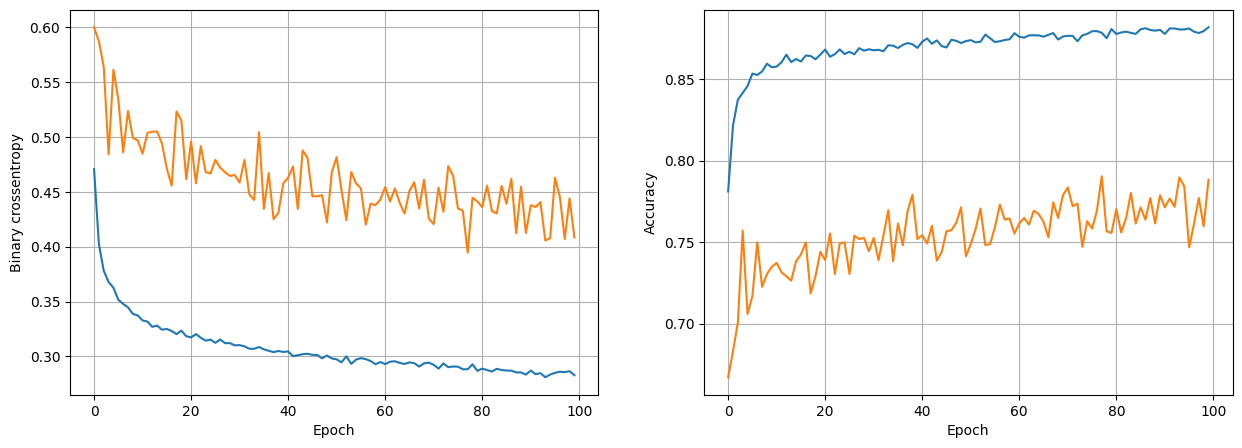

Validation loss: 0.3094
64 nodes, 0.2 dropout, 0.001 lr, 128 batch size


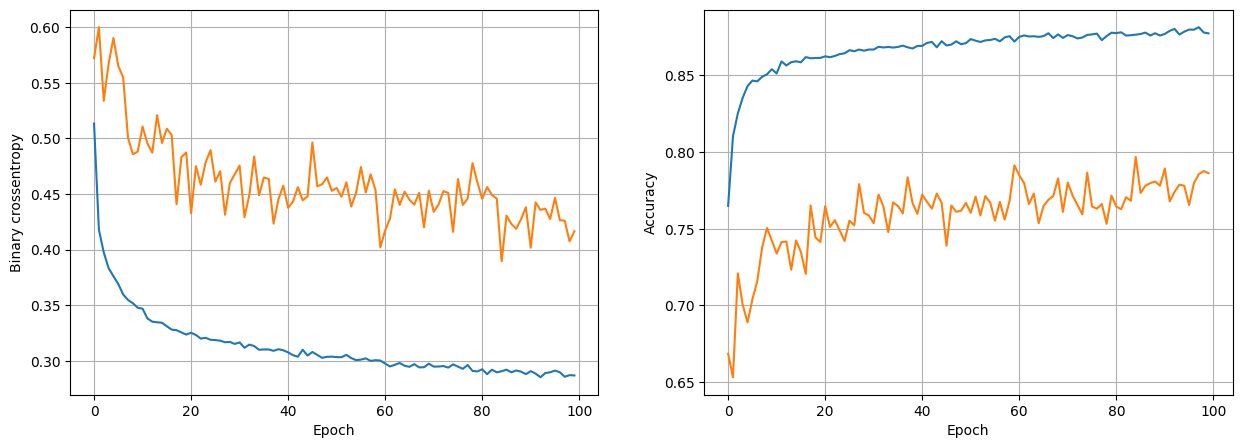

Validation loss: 0.3086


In [423]:
least_val_loss = float('inf') # Initialize the best validation loss to infinity
least_loss_model = None
epoch = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, {dropout_prob} dropout, {lr} lr, {batch_size} batch size")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, epoch, batch_size)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid, verbose=0)[0] # Evaluate the model on the validation set
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                print(f"Validation loss: {val_loss:.4f}")

In [424]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='val')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='train')
    ax2.plot(history.history['val_accuracy'], label='val')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)           
    plt.show()

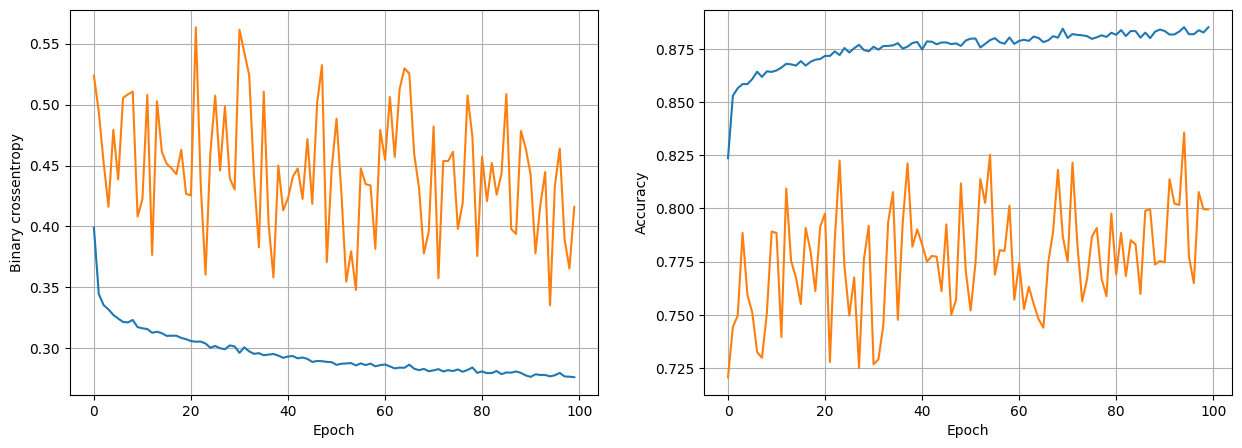

In [ ]:
plot_history(history) 

In [426]:
y_pred = least_loss_model.predict(x_test) # Predict the labels for the test set
y_pred = (y_pred > 0.5).astype(int).reshape(-1) # Convert probabilities to binary labels

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


In [427]:
print(classification_report(y_test, y_pred)) # Print classification report

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2487
           1       0.80      0.94      0.86      2487

    accuracy                           0.85      4974
   macro avg       0.86      0.85      0.85      4974
weighted avg       0.86      0.85      0.85      4974

